<a href="https://colab.research.google.com/github/walkerjian/Physics/blob/main/Transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transforms**
Where we intially consider if the Laplace Transform (LT) is a generalisation of the Fourier Transform (FT).

The **Laplace transform** can be considered a generalisation of the **Fourier transform**. Here's how they are related:

### Fourier Transform:
The Fourier transform is defined for a function $ f(t) $ as:

$$
F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-j\omega t} \, dt
$$

This transform focuses on representing functions in terms of oscillatory components (frequencies) and assumes that $ f(t) $ is well-behaved enough to converge within the infinite bounds.

### Laplace Transform:
The Laplace transform is more general and is defined as:

$$
F(s) = \int_{0}^{\infty} f(t) e^{-st} \, dt
$$

Here, $ s $ is a complex number: $ s = \sigma + j\omega $, where $ \sigma $ is the real part and $ \omega $ is the imaginary part. The Laplace transform includes an additional exponential decay factor ($ e^{-\sigma t} $) that allows it to handle a broader class of functions, including those that grow exponentially.

### Generalization Perspective:
- The Fourier transform can be seen as a special case of the Laplace transform where $ \sigma = 0 $, i.e., $ s = j\omega $.
- The Laplace transform can handle signals that are not absolutely integrable over $ (-\infty, \infty) $, as it introduces a convergence factor $ e^{-\sigma t} $ to "control" the function's behavior for $ t \to \infty $.
- By varying $ \sigma $, the Laplace transform can analyze the stability and transient behavior of systems, which is not directly possible with the Fourier transform.

### Applications:
- **Fourier Transform**: Primarily used for frequency domain analysis of steady-state signals.
- **Laplace Transform**: Used in control theory, stability analysis, and system modeling, particularly for systems with transient responses.

In summary, the Laplace transform extends the Fourier transform by allowing analysis in the complex frequency domain, thereby accommodating a wider range of functions and system behaviours. If you have a spectrum created by the **Fourier Transform (FT)**, you can extend it to a spectrum created by the **Laplace Transform (LT)**, but the process depends on the properties of the original function and how you handle the Laplace transform's complex frequency domain.

### How the Spectra Compare:
1. **Fourier Transform Spectrum:**
   - The Fourier transform $ F(\omega) $ gives a spectrum of the function in terms of purely oscillatory components, assuming $ \sigma = 0 $ in the Laplace domain (i.e., $ s = j\omega $).
   - This is essentially a slice of the Laplace transform spectrum along the $ \sigma = 0 $ line in the complex plane.

2. **Laplace Transform Spectrum:**
   - The Laplace transform $ F(s) $, where $ s = \sigma + j\omega $, generalizes the Fourier spectrum by incorporating the damping factor $ e^{-\sigma t} $.
   - The Laplace spectrum includes not only frequency information (the imaginary part $ \omega $) but also information about the growth or decay of the signal (the real part $ \sigma $).

### Steps to Extend an FT Spectrum to an LT Spectrum:
If you already have a Fourier transform spectrum $ F(\omega) $, you can use it as a starting point to build the Laplace spectrum $ F(s) $, provided the function $ f(t) $ satisfies the Laplace transform's convergence conditions. Here's how:

1. **From FT to LT:**
   - Interpret the FT spectrum $ F(\omega) $ as a slice of the Laplace transform spectrum along $ s = j\omega $.
   - To extend the FT spectrum into the Laplace domain, you would calculate $ F(s) $ for $ s = \sigma + j\omega $, which means integrating $ f(t) e^{-\sigma t} e^{-j\omega t} $, effectively adding a damping term to the FT.

2. **Mathematically:**
   $$
   F(s) = \int_{0}^{\infty} f(t) e^{-\sigma t} e^{-j\omega t} \, dt
   $$
   - Here, $ \sigma \neq 0 $ allows the spectrum to include damping (or growth) information that is absent in the FT.

3. **Visualization:**
   - The FT spectrum $ F(\omega) $ is a 1D representation along the $ \sigma = 0 $ axis in the complex $ s $-plane.
   - The LT spectrum $ F(s) $ is a 2D surface in the $ s $-plane, encompassing both real (damping) and imaginary (frequency) components.

### Practical Considerations:
- The Laplace transform spectrum may not be computable directly from the Fourier transform spectrum unless you have the original time-domain function $ f(t) $, because the LT requires information about the behavior of $ f(t) $ with damping ($ \sigma \neq 0 $).
- If $ f(t) $ is known, you can compute both transforms and verify the relationship.

### Summary:
Yes, an LT spectrum can be created if you start with an FT spectrum, but you need to account for the extra dimension introduced by the real part of $ s = \sigma + j\omega $. The LT spectrum provides more information, particularly about the growth or decay of the signal, than the FT spectrum alone.

##Example:
An FM-modulated carrier wave (sinusoid) with FT and LP spectra.

1. **FM Modulated Signal**:
   - The time-domain representation of the FM signal shows its amplitude modulated with a sinusoidal pattern corresponding to the modulating frequency.

2. **Fourier Transform Spectrum**:
   - This shows the frequency components of the FM signal. The spectrum highlights the carrier frequency (at 1000 Hz) and sidebands generated by modulation. The sidebands' spacing corresponds to the modulating frequency (50 Hz).

3. **Laplace Transform Spectrum**:
   - The Laplace transform spectrum includes a damping factor ($e^{-\sigma t} $, which attenuates the signal as time progresses. This spectrum reflects both frequency information and the decay effect, leading to a slightly broader and less sharp appearance compared to the Fourier spectrum.

The Laplace spectrum demonstrates how the damping factor impacts the frequency domain, adding another layer of analysis to transient or decaying signals.

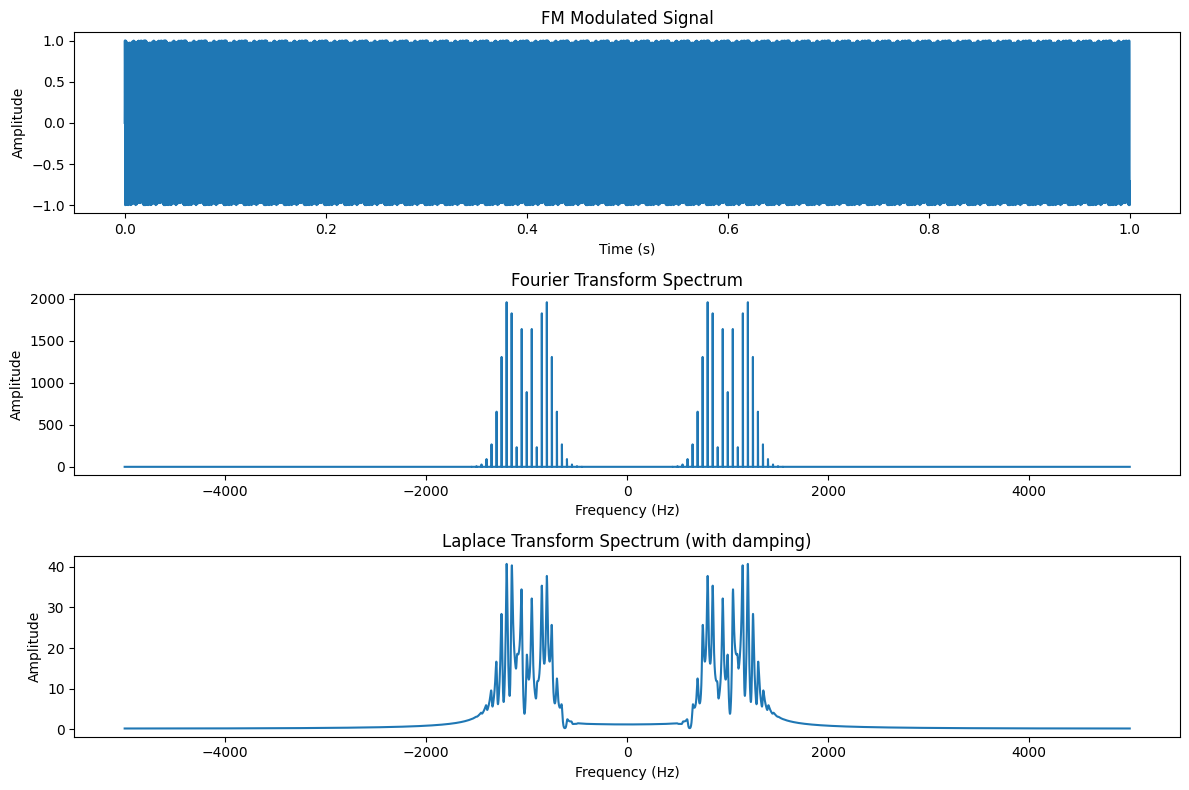

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.fftpack import fft, fftshift
from scipy.signal import find_peaks

# Generate an FM modulated signal
fs = 10000  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time vector, 1 second duration
fc = 1000  # Carrier frequency in Hz
fm = 50    # Modulating frequency in Hz
mod_index = 5  # Modulation index

# FM signal
modulating_signal = np.sin(2 * np.pi * fm * t)  # Modulating signal
instantaneous_phase = 2 * np.pi * fc * t + mod_index * np.sin(2 * np.pi * fm * t)
fm_signal = np.sin(instantaneous_phase)

# Fourier Transform Spectrum
freq = np.linspace(-fs/2, fs/2, len(t))
ft_spectrum = fftshift(np.abs(fft(fm_signal)))

# Laplace Transform Spectrum (approximation with decay factor)
sigma = 50  # Damping factor for Laplace transform
laplace_spectrum = fftshift(np.abs(fft(fm_signal * np.exp(-sigma * t))))

# Plotting
plt.figure(figsize=(12, 8))

# Original FM Signal
plt.subplot(3, 1, 1)
plt.plot(t, fm_signal)
plt.title("FM Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Fourier Transform Spectrum
plt.subplot(3, 1, 2)
plt.plot(freq, ft_spectrum)
plt.title("Fourier Transform Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

# Laplace Transform Spectrum
plt.subplot(3, 1, 3)
plt.plot(freq, laplace_spectrum)
plt.title("Laplace Transform Spectrum (with damping)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


##Discussion and Analysis of LT vs FT:
The **Laplace transform spectrum** conveys additional information compared to the **Fourier transform spectrum** by incorporating both growth/decay behavior and oscillatory components of a signal. This makes it especially useful in analyzing transient, unstable, or non-periodic signals. Here's a deeper exploration:

---

### 1. **How the Laplace Spectrum Conveys Additional Information**
The Laplace transform generalizes the Fourier transform by introducing a complex frequency parameter, $ s = \sigma + j\omega $. This means the Laplace spectrum spans two dimensions:

- **Decay/Growth Information ($ \sigma $)**:
  - The real part of $ s $, $ \sigma $, represents the exponential damping (or growth) factor $ e^{-\sigma t} $ applied to the signal.
  - A spectrum with $ \sigma > 0 $ reveals how the signal behaves under decay (attenuation over time).
  - Similarly, $ \sigma < 0 $ shows amplification or growth over time.

- **Oscillatory Information ($ \omega $)**:
  - The imaginary part of $ s $, $ \omega $, represents the frequency components, just as in the Fourier transform.

By varying $ \sigma $, the Laplace spectrum reveals how the signal behaves under different rates of decay or growth. For example:
  - In a physical system (like a spring-mass-damper), the Laplace spectrum can show both the natural oscillation frequency and how quickly the oscillation decays (damping ratio).
  - For an FM-modulated signal, the Laplace spectrum includes sideband frequencies but attenuates their contributions progressively based on the damping factor.

---

### 2. **Interpreting the Laplace Spectrum Meaningfully**
Interpreting the Laplace spectrum requires understanding how the signal's behavior changes with $ \sigma $. Here are steps and examples:

- **Analyzing Stability**:
  - In control systems, a system is stable if all poles of the Laplace transform lie in the left half of the $ s $-plane ($ \sigma < 0 $). Poles in the right half ($ \sigma > 0 $) indicate an unstable system.

- **Transient vs. Steady-State Behavior**:
  - The Laplace transform captures both the transient (damping) and steady-state (oscillatory) responses of a signal. For instance, a decaying sine wave would appear as a broadened peak in the Laplace spectrum, with the width dependent on $ \sigma $.

- **Physical Insights**:
  - In circuits or mechanical systems, the Laplace spectrum helps identify resonances, damping factors, and growth rates, enabling engineers to design stable systems.

---

### 3. **Why is the Fourier Transform Typically Used?**
Despite its power, the Laplace transform is less commonly used in science compared to the Fourier transform for practical and conceptual reasons:

- **Steady-State Focus of Science**:
  - Many problems in physics and engineering deal with periodic or steady-state signals, where transient behaviors (growth or decay) are negligible or can be ignored. The Fourier transform is well-suited for this since it focuses only on oscillatory components.

- **Computational Simplicity**:
  - The Fourier transform is computationally simpler because it requires only one dimension ($ \omega $) to analyze the spectrum, rather than the two-dimensional $ \sigma + j\omega $ domain of the Laplace transform.

- **Interpretability**:
  - The Fourier transform directly links to physical quantities like frequency and energy, which are more intuitive for analyzing signals in areas like audio, optics, and quantum mechanics.
  - The Laplace transform’s damping factor makes its interpretation more abstract and complex.

- **Availability of Fast Algorithms**:
  - Fast Fourier Transform (FFT) algorithms make the Fourier transform highly efficient and widely used for real-time signal processing and analysis.

---

### 4. **When is the Laplace Transform Preferable?**
While the Fourier transform is dominant, the Laplace transform shines in specialized scenarios:

- **Transient Analysis**:
  - Systems with start-up behaviors or non-periodic signals, such as electrical circuits powering on or mechanical systems under sudden forces, are best analyzed with the Laplace transform.

- **Control Systems and Stability**:
  - Engineers rely on the Laplace transform to design controllers (e.g., PID controllers) and ensure systems are stable by analyzing the $ s $-plane.

- **System Dynamics and Impulse Response**:
  - The Laplace transform directly relates to the impulse response of a system, making it invaluable in system modeling.

---

### 5. **Conclusion: FT vs. LT**
- **Fourier Transform**:
  - Simpler, focuses on oscillatory components, well-suited for steady-state, periodic, or infinite-duration signals.
  - Widely applicable in physics, signal processing, and data analysis due to intuitive frequency representation and computational efficiency.

- **Laplace Transform**:
  - More general, includes decay/growth factors, and is invaluable for transient behavior, stability analysis, and system dynamics.
  - Preferred in engineering disciplines like control theory and electrical circuits, where transient behaviors cannot be ignored.

Both transforms are tools in the mathematical toolbox, with the Fourier transform being the more intuitive and computationally efficient choice for many scientific applications.

##Display of the LT:
There are better ways to visualise the additional information conveyed by the **Laplace Transform (LT)**, especially given its two-dimensional nature (real part $\sigma$ and imaginary part $\omega$). Some commonly used approaches are:

---

### 1. **3D or Surface Plot**
A **3D plot** can effectively represent the Laplace spectrum:

- **Axes**:
  - $ \sigma $ (real part) on the x-axis
  - $ \omega $ (imaginary part) on the y-axis
  - Amplitude (magnitude of the Laplace transform) on the z-axis

- **Interpretation**:
  - Peaks along the $ \omega $-axis (for fixed $ \sigma $) correspond to oscillatory components.
  - Changes along the $ \sigma $-axis show the effect of damping or growth.

This visualization provides an intuitive understanding of how frequency components behave under different damping/growth conditions.

---

### 2. **Heatmap or Contour Plot**
A **heatmap** or **contour plot** projects the 3D data onto a 2D plane:

- **Representation**:
  - $ \sigma $ on one axis, $ \omega $ on the other, and amplitude shown via color intensity.
  - Contour lines (or color gradients) indicate regions of equal amplitude.

- **Advantages**:
  - Compact and easy to read, especially when focusing on specific regions of interest.

---

### 3. **Cepstrum (Spectral Analysis Tool)**
The **cepstrum** is another tool, but it's conceptually distinct from the Laplace transform. The cepstrum is the Fourier transform of the logarithm of the spectrum's magnitude:

- **Use Case**:
  - Primarily used in signal processing to separate periodic components from the envelope of a spectrum.
  - It's not directly a display of the Laplace spectrum but can complement it when analyzing signals with periodic structures or echoes.

---

### 4. **Bode-Like Plot (Separate $\sigma$ and $\omega$ Contributions)**
Similar to Bode plots in control systems, you can split the LT visualization into two parts:

- **Magnitude Spectrum**:
  - A plot of $ |F(s)| $ against $ \sigma $ for different fixed values of $ \omega $, showing how the damping affects the signal's magnitude.
  
- **Phase Spectrum**:
  - A plot of the phase of $ F(s) $ against $ \sigma $, which provides insight into how damping shifts the phase of the frequency components.

This method decomposes the LT's contributions and focuses on analyzing the response separately.

---

### 5. **Animated Visualization**
Animations can dynamically show how the Laplace spectrum evolves as $\sigma$ varies:

- **Method**:
  - Generate a sequence of Fourier-like spectra for different $\sigma$ values and animate them.
  - This allows users to visually connect the FT ($ \sigma = 0 $) with broader LT behavior.

---

### 6. **Wavelet Transform (Alternative Representation)**
Wavelet transforms are conceptually related and offer a way to analyze signals in both time and frequency, somewhat like the Laplace transform:

- **Benefits**:
  - Provides a time-localized spectrum, unlike the Laplace transform, which emphasizes growth/decay.
  - The scalogram (a 2D representation of wavelet coefficients) can visually complement the Laplace spectrum.

---

### Example: Creating a 3D Plot for the Laplace Spectrum
A **3D surface plot** of the Laplace spectrum for the FM-modulated signal, showcasing the damping effect along $\sigma$.

This 3D surface plot displays the **Laplace Transform Spectrum**:

- **X-axis ($\sigma$)**: The damping factor, showing how the spectrum changes as the signal is attenuated or grows.
- **Y-axis ($\omega$)**: The frequency components, as in the Fourier spectrum.
- **Z-axis (Amplitude)**: The magnitude of the Laplace transform, which combines information from both damping and oscillation.

### Key Observations:
- At $\sigma = 0$, the spectrum corresponds to the Fourier Transform.
- As $\sigma$ increases, the spectrum attenuates, reflecting the signal's response to damping.
- Peaks shift and broaden depending on the interaction between damping and the signal's oscillatory nature.

This visualization makes it easier to interpret how the signal behaves under varying damping conditions, providing insights beyond the Fourier spectrum.

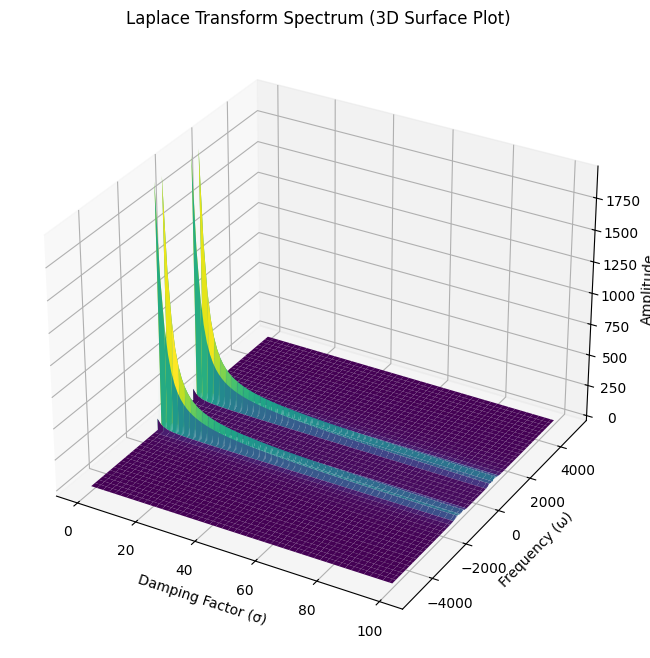

In [2]:
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the Laplace Transform Spectrum
sigma_values = np.linspace(0, 100, 100)  # Real part of s (damping factors)
omega_values = freq  # Imaginary part of s (frequencies)
laplace_3d_spectrum = np.zeros((len(sigma_values), len(omega_values)))

# Compute Laplace spectrum for each sigma value
for i, sigma in enumerate(sigma_values):
    laplace_3d_spectrum[i, :] = np.abs(fftshift(fft(fm_signal * np.exp(-sigma * t))))

# Create a 3D plot
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
sigma_grid, omega_grid = np.meshgrid(sigma_values, omega_values)

# Plot surface
ax.plot_surface(sigma_grid, omega_grid, laplace_3d_spectrum.T, cmap='viridis', edgecolor='none')
ax.set_title("Laplace Transform Spectrum (3D Surface Plot)")
ax.set_xlabel("Damping Factor (σ)")
ax.set_ylabel("Frequency (ω)")
ax.set_zlabel("Amplitude")
plt.show()


## LT and FT "Zoo":
A table summarising common signals along with their Fourier Transform (FT) and Laplace Transform (LT) representations. The Laplace Transform expressions highlight how they generalize the corresponding Fourier counterparts.

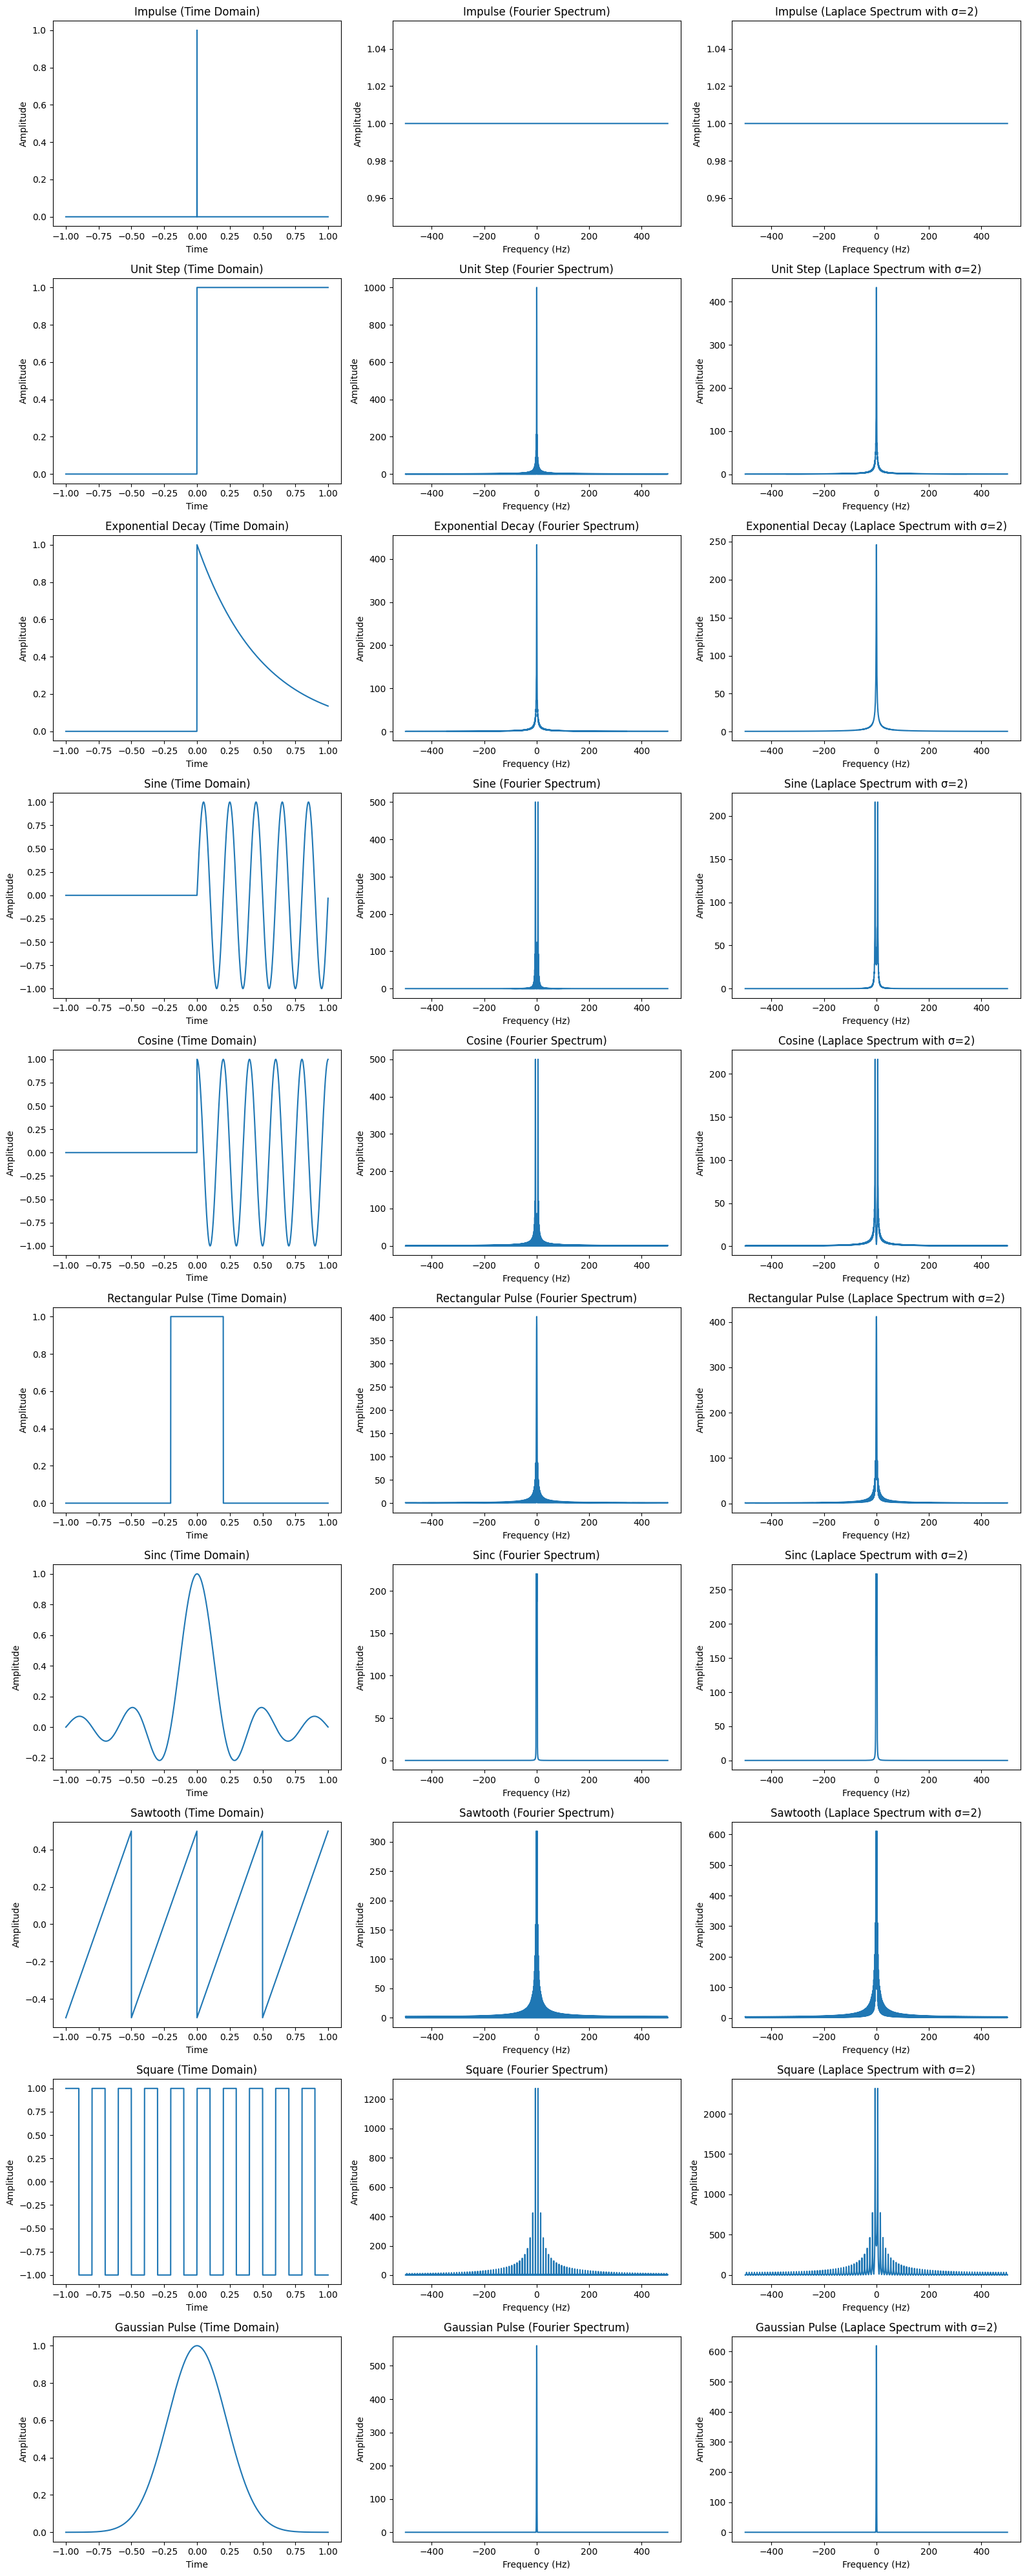

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift

# Parameters
fs = 1000  # Sampling frequency
t = np.linspace(-1, 1, 2 * fs, endpoint=False)  # Time vector
freq = np.linspace(-fs / 2, fs / 2, len(t))  # Frequency vector

# Signal Definitions
signals = {
    "Impulse": lambda t: np.where(t == 0, 1, 0),
    "Unit Step": lambda t: np.where(t >= 0, 1, 0),
    "Exponential Decay": lambda t: np.exp(-2 * t) * (t >= 0),
    "Sine": lambda t: np.sin(2 * np.pi * 5 * t) * (t >= 0),
    "Cosine": lambda t: np.cos(2 * np.pi * 5 * t) * (t >= 0),
    "Rectangular Pulse": lambda t: np.where((t >= -0.2) & (t <= 0.2), 1, 0),
    "Sinc": lambda t: np.sinc(5 * t),
    "Sawtooth": lambda t: 2 * (t % 0.5) - 0.5,
    "Square": lambda t: np.sign(np.sin(2 * np.pi * 5 * t)),
    "Gaussian Pulse": lambda t: np.exp(-t**2 / 0.1)
}

# Plot Signals and their Spectra
plt.figure(figsize=(16, len(signals) * 4))

for i, (name, signal_func) in enumerate(signals.items()):
    # Generate signal
    signal = signal_func(t)

    # Compute Fourier Transform
    ft_spectrum = fftshift(np.abs(fft(signal)))

    # Compute Laplace Transform Spectrum (with damping)
    sigma = 2  # Damping factor
    laplace_spectrum = fftshift(np.abs(fft(signal * np.exp(-sigma * t))))

    # Plot Time-Domain Signal
    plt.subplot(len(signals), 3, i * 3 + 1)
    plt.plot(t, signal)
    plt.title(f"{name} (Time Domain)")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

    # Plot Fourier Spectrum
    plt.subplot(len(signals), 3, i * 3 + 2)
    plt.plot(freq, ft_spectrum)
    plt.title(f"{name} (Fourier Spectrum)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")

    # Plot Laplace Spectrum
    plt.subplot(len(signals), 3, i * 3 + 3)
    plt.plot(freq, laplace_spectrum)
    plt.title(f"{name} (Laplace Spectrum with σ={sigma})")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


## 2D Spectra of LT and FT:
A **spectrogram** is a powerful way to visualise time-varying frequency content, but integrating the extra dimension from the Laplace Transform (LT) into such a representation requires careful consideration. Let's break it down:

---

### 1. **Spectrograms and the Fourier Transform**
- A spectrogram is a time-frequency representation obtained by taking the **Fourier Transform** of short, overlapping segments of a signal (Short-Time Fourier Transform, or STFT).
- It shows how frequency content evolves over time, with intensity represented by color or brightness.

---

### 2. **Laplace Transform of Voice Data**
- The LT adds an extra dimension ($ \sigma $, damping/growth) to the frequency analysis. For voice data:
  - The **real part** ($ \sigma $) could provide information about the decay rate or transient characteristics of speech.
  - The **imaginary part** ($ \omega $) remains the standard frequency content as in the Fourier Transform.

---

### 3. **Is It Sensible to Use the LT for Voice Data?**
- **Advantages**:
  - The LT could reveal additional insights about how voice transients (like plosives or rapid decays) evolve.
  - It may be useful in analyzing vocal dynamics or speech with strong amplitude modulations.

- **Challenges**:
  - A spectrogram with an extra dimension ($ \sigma $) is harder to interpret visually.
  - Most practical voice analyses are adequately handled by the FT because damping effects are usually small.

---

### 4. **How to Show LT on a Spectrogram?**
We could visualize the Laplace spectrogram in one of the following ways:

#### A. **Multiple 2D Spectrograms (Slices of $\sigma$)**
- Generate and display spectrograms for different values of $\sigma$ (damping factors).
- Each spectrogram represents the frequency content for a specific damping level.

#### B. **3D Spectrogram**
- Use a 3D plot where the axes are time, frequency ($ \omega $), and amplitude, with an additional parameter ($ \sigma $) encoded as a fourth dimension (e.g., color or another axis).

#### C. **Animated Spectrogram**
- Animate how the spectrogram changes as $\sigma$ varies, similar to sweeping through Laplace Transform parameters in time-frequency space.

---

### 5. **Implementation Example: Fake Voice Data**
Let’s generate some synthetic voice data (e.g., vowels or sine waveforms modulated to mimic speech), compute both FT and LT spectrograms, and visualize them. I'll prepare a code example for this.

This visualization compares the **Fourier Transform (FT) spectrogram** with an **example Laplace Transform (LT) spectrogram** for synthetic voice-like data:

1. **FT Spectrogram**:
   - Shows the time-frequency distribution of the signal's power. Peaks correspond to the fundamental frequencies and their harmonics, modulated over time by the slow amplitude variation.

2. **LT Spectrogram (with damping factor $\sigma = 20$)**:
   - Includes the effect of exponential damping ($ e^{-\sigma t} $), causing higher frequencies to decay faster. This introduces new transient behavior not visible in the FT spectrogram.

---

### Observations:
- The LT spectrogram highlights transient or decaying dynamics, which are less prominent in the FT spectrogram.
- By varying $\sigma$, you can emphasize how different frequency components evolve under damping.

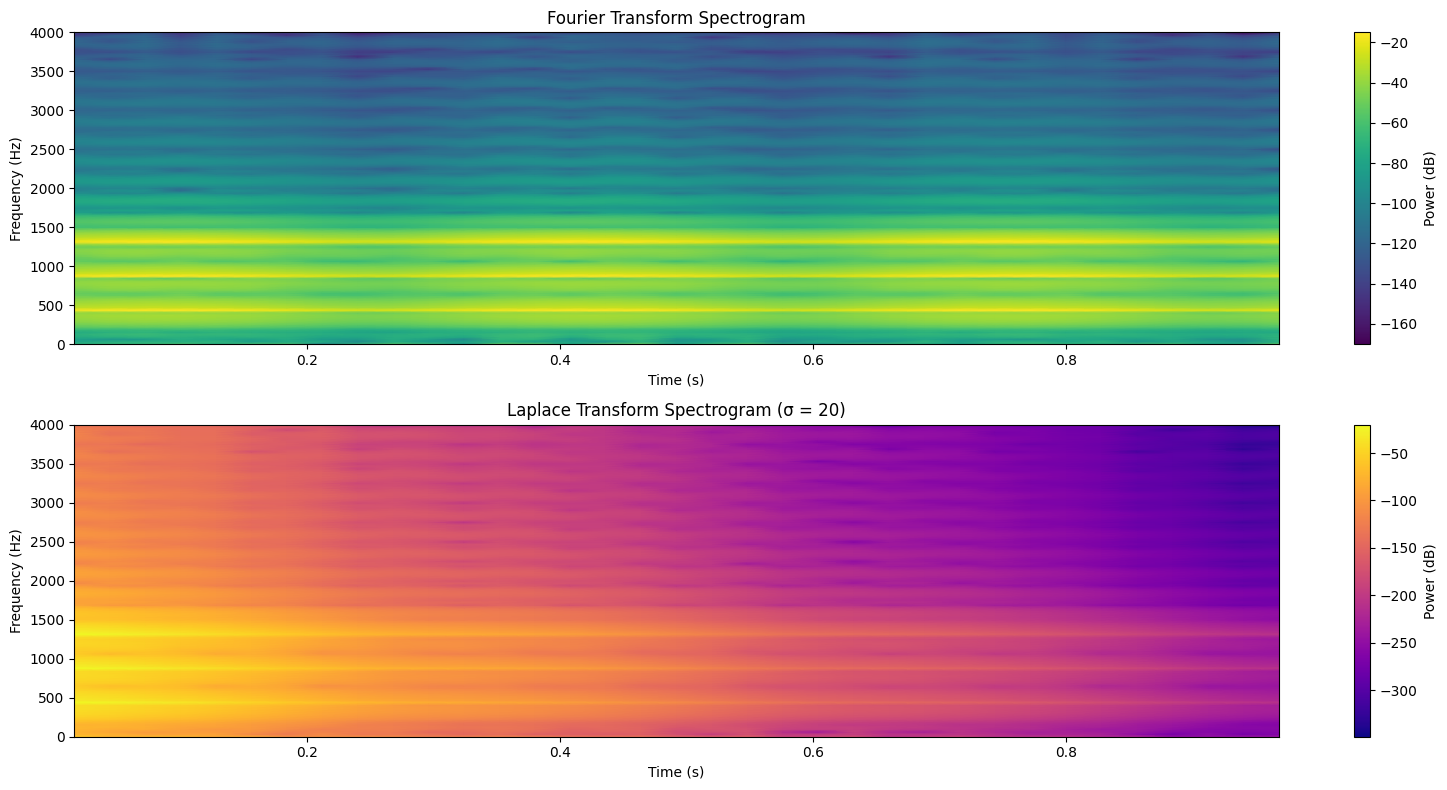

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Generate synthetic voice-like data (sum of modulated sinusoids)
fs = 8000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second duration
f1, f2, f3 = 440, 880, 1320  # Frequencies (like formants of a vowel sound)
modulator = 1 + 0.5 * np.sin(2 * np.pi * 3 * t)  # Slow amplitude modulation
voice_data = modulator * (np.sin(2 * np.pi * f1 * t) +
                          np.sin(2 * np.pi * f2 * t) +
                          np.sin(2 * np.pi * f3 * t))

# Short-Time Fourier Transform (STFT) for spectrogram
f_ft, t_ft, Sxx_ft = spectrogram(voice_data, fs=fs, nperseg=256)

# Short-Time Laplace Transform Spectrogram (adding damping)
sigma_values = np.linspace(0, 50, 10)  # Range of damping factors
laplace_spectrograms = []
for sigma in sigma_values:
    damped_data = voice_data * np.exp(-sigma * t)  # Apply damping
    f_lt, t_lt, Sxx_lt = spectrogram(damped_data, fs=fs, nperseg=256)
    laplace_spectrograms.append(Sxx_lt)

# Plotting
plt.figure(figsize=(16, 8))

# FT Spectrogram
plt.subplot(2, 1, 1)
plt.pcolormesh(t_ft, f_ft, 10 * np.log10(Sxx_ft), shading='gouraud', cmap='viridis')
plt.colorbar(label='Power (dB)')
plt.title("Fourier Transform Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

# LT Spectrogram (for a specific damping factor as an example)
sigma_example = 20
example_index = np.searchsorted(sigma_values, sigma_example)
plt.subplot(2, 1, 2)
plt.pcolormesh(t_lt, f_lt, 10 * np.log10(laplace_spectrograms[example_index]), shading='gouraud', cmap='plasma')
plt.colorbar(label='Power (dB)')
plt.title(f"Laplace Transform Spectrogram (σ = {sigma_example})")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import ipywidgets as widgets
from IPython.display import display

# Generate synthetic voice-like data
fs = 8000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second duration
f1, f2, f3 = 440, 880, 1320  # Frequencies
modulator = 1 + 0.5 * np.sin(2 * np.pi * 3 * t)  # Amplitude modulation
voice_data = modulator * (np.sin(2 * np.pi * f1 * t) +
                          np.sin(2 * np.pi * f2 * t) +
                          np.sin(2 * np.pi * f3 * t))

# Generate Laplace spectrograms for a range of sigma values
sigma_values = np.linspace(0, 50, 50)  # Range of damping factors
laplace_spectrograms = []
for sigma in sigma_values:
    damped_data = voice_data * np.exp(-sigma * t)  # Apply damping
    f_lt, t_lt, Sxx_lt = spectrogram(damped_data, fs=fs, nperseg=256)
    laplace_spectrograms.append(Sxx_lt)

# Function to display the plot dynamically
def plot_spectrogram(sigma_index):
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t_lt, f_lt, 10 * np.log10(laplace_spectrograms[sigma_index]), shading='gouraud', cmap='plasma')
    plt.colorbar(label='Power (dB)')
    plt.title(f"Laplace Transform Spectrogram (σ = {sigma_values[sigma_index]:.2f})")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

# Create an interactive widget
interactive_plot = widgets.interactive(plot_spectrogram, sigma_index=widgets.IntSlider(min=0, max=len(sigma_values)-1, step=1, value=0))
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='sigma_index', max=49), Output()), _dom_classes=('widget-…

### Some Tips for Gaining Intuition:
1. **Start with Low $\sigma$**:
   - Observe how the Laplace spectrogram initially resembles the Fourier spectrogram. This helps anchor your understanding in familiar territory.

2. **Increase $\sigma$ Gradually**:
   - Notice how higher damping values ($\sigma$) start to suppress high-frequency components and emphasize transient, low-frequency behavior.

3. **Identify Patterns**:
   - Pay attention to how modulated frequencies, harmonics, and other features behave differently as $\sigma$ increases. This reveals how transient dynamics interact with spectral components.

4. **Experiment**:
   - Modify the signal (e.g., change modulating frequencies, add noise, or use real voice data) to see how the Laplace spectrogram adapts.


### 1. **Capturing Transient Dynamics**
The **Laplace Transform (LT)** is particularly useful for analyzing transients because it provides a framework that naturally incorporates both the oscillatory and exponential decay (or growth) behaviors of signals. Here's how it helps:

---


- **Transient Signals**:
  - Transients are short-lived phenomena that occur during the start or end of a signal, such as spikes, decays, or oscillations before reaching a steady state.
  - Examples include the startup of an electrical circuit, the motion of a pendulum after being pushed, or the initial vowel in speech.

- **Role of LT**:
  - The LT handles these transient behaviors by including the exponential factor $ e^{-\sigma t} $, where $ \sigma $ (real part of $ s $) determines the rate of growth or decay.
  - This means the LT provides a comprehensive view of both the steady-state (oscillatory, captured by $ \omega $) and transient (decaying or growing, captured by $ \sigma $) behaviors.

---

### 2. **Mathematical Flexibility**
- The LT operates on signals defined over $ [0, \infty) $, making it inherently suited for initial-value problems where transients dominate.
- The real part of $ s = \sigma + j\omega $ gives insight into how the amplitude of a signal evolves over time:
  - **$ \sigma < 0 $**: Represents growth (e.g., unstable transients).
  - **$ \sigma > 0 $**: Represents decay (e.g., damping or energy dissipation).

---

### 3. **Pole-Zero Analysis**
In control systems and signal processing, the **poles** of the Laplace Transform (roots of the denominator) reveal critical information about transients:
- **Poles in the Left Half-Plane ($ \text{Re}(s) < 0 $)**:
  - Correspond to exponentially decaying transients, leading to a stable system.
- **Poles in the Right Half-Plane ($ \text{Re}(s) > 0 $)**:
  - Correspond to exponentially growing transients, indicating instability.
- **Poles on the Imaginary Axis ($ \text{Re}(s) = 0 $)**:
  - Correspond to undamped oscillations.

This analysis helps engineers and scientists predict, control, and design systems to handle transients effectively.

---

### 4. **Transient-Only Analysis**
By selecting specific regions in the $ s $-plane, the LT allows the isolation of transient components:
- Choosing $ \sigma > 0 $ emphasizes decaying transients, suppressing long-term steady-state components.
- This is in contrast to the Fourier Transform (FT), which assumes a steady-state signal over infinite time and doesn't naturally distinguish between transient and steady-state behavior.

---

### 5. **Applications**
- **Electrical Circuits**:
  - Analyze the charging and discharging of capacitors, inrush currents, or sudden changes in voltage.
- **Mechanical Systems**:
  - Study the initial oscillations and damping in systems like pendulums or spring-mass-damper systems.
- **Speech and Audio**:
  - Capture the transient nature of plosives and other rapid onsets in speech.
- **Control Systems**:
  - Design controllers that stabilize systems by damping unwanted transients.

---

### Example Intuition
Consider a damped sinusoid:
$$
f(t) = e^{-\alpha t} \sin(\omega_0 t) u(t)
$$
- **Fourier Transform**:
  - Focuses only on the oscillatory frequency $ \omega_0 $, ignoring the decay factor $ e^{-\alpha t} $.
- **Laplace Transform**:
  - Encodes both $ \omega_0 $ (oscillation) and $-\alpha$ (decay) in the poles at $ s = -\alpha \pm j\omega_0 $.

---

### Visualization in Spectrograms
When you use the LT to analyze signals, the damping factor $ \sigma $ reveals how different frequency components evolve over time:
- For higher $ \sigma $, transient behavior is emphasized as decaying components dominate.
- This can uncover details that are invisible in an FT spectrogram, such as how a signal fades or stabilizes over time.

---

In short, the LT's ability to handle both decay and oscillation simultaneously makes it a powerful tool for transient analysis, offering insights that the FT can't easily provide.

##Music and LT:
The **Laplace Transform (LT)** can reveal fascinating aspects of music, offering insights into both the transient and steady-state behavior of musical signals. While the **Fourier Transform (FT)** is commonly used in music analysis to study steady-state frequency components (harmonics, melodies, and chords), the LT adds an extra layer of detail by incorporating transient dynamics, growth, and decay. Here's what the LT can reveal about music:

---

### 1. **Transient Dynamics**
- **Musical Transients**:
  - Transients occur during sudden changes in music, such as note onsets, drum hits, or plucking a string. These are critical to the timbre and character of a sound.
- **What LT Reveals**:
  - By analyzing how the spectrum evolves with different damping factors ($\sigma$), the LT can highlight how transients decay or fade over time.
  - For example:
    - A sharp piano note has a strong, fast-decaying transient.
    - A bowed violin string has a slower onset and decay, with sustained harmonics.

---

### 2. **Decay and Reverberation**
- **Reverberation**:
  - Music played in a reverberant space (like a cathedral) creates a decaying echo of each note.
- **What LT Reveals**:
  - The LT can isolate and analyze the decay profile of the reverberation by varying $\sigma$, showing how long different frequencies persist in the sound.
  - This can help distinguish between natural reverb and synthetic effects or analyze room acoustics.

---

### 3. **Instrument Characteristics**
- **Timbre and Envelopes**:
  - Different instruments have unique amplitude envelopes (attack, sustain, decay, release) that contribute to their timbre.
- **What LT Reveals**:
  - By focusing on specific damping factors, the LT can reveal subtle differences in how energy is distributed over time for various instruments.
  - For instance:
    - A flute produces smooth, steady tones.
    - A plucked guitar string shows a fast-decaying envelope.

---

### 4. **Performance Dynamics**
- **Articulation and Expression**:
  - Musicians add expressive dynamics to music, such as crescendo (gradual increase in volume) or staccato (short, detached notes).
- **What LT Reveals**:
  - The LT can quantify these changes by examining how amplitude and frequency components evolve with time and decay.
  - For example, a crescendo would appear as growth in spectral energy over time.

---

### 5. **Comparison of Styles and Genres**
- **Transient-Driven Genres**:
  - Percussion-heavy genres (e.g., rock, electronic) emphasize strong transients, which the LT can isolate and analyze.
- **Sustained Genres**:
  - Ambient or classical music with long, sustained tones shows slower decays and subtle transient behavior, which the LT captures well.

---

### 6. **Damping Effects in Music Production**
- **Effects like EQ, Compression, and Reverb**:
  - Music producers often manipulate decay and transient characteristics using tools like compressors or reverb.
- **What LT Reveals**:
  - The LT provides a way to visualize how these effects impact the damping and decay of specific frequencies, helping producers fine-tune their sound.

---

### 7. **Visualizing Music with LT**
A **Laplace spectrogram** could show how different frequencies in music decay over time, compared to the steady-state focus of a Fourier spectrogram. For example:
- **FT Spectrogram**:
  - Shows a "snapshot" of frequency content over time.
- **LT Spectrogram**:
  - Adds a decay/growth dimension, revealing how individual notes and harmonics evolve.

---

### Example Applications:
1. **Analyzing Room Acoustics**:
   - Understand how different instruments interact with the acoustic environment by observing decay rates of frequencies.
2. **Identifying Instrument Signatures**:
   - Differentiate between instruments by comparing transient and decay characteristics.
3. **Studying Performance Techniques**:
   - Analyze vibrato, tremolo, or staccato by looking at growth and decay patterns.
4. **Music Restoration**:
   - Isolate and analyze transient decays in old recordings to better restore or clean the audio.

---


##Visualisation of LT in Music:
Here are spectrograms for some synthetic "music" combining a simple melody with transient drum-like pulses:

1. **Fourier Transform (FT) Spectrogram**:
   - Shows the steady-state frequency content of the melody and transient components.
   - Each note (A4, E5, A5) appears as horizontal bands corresponding to their frequencies (440 Hz, 660 Hz, 880 Hz).
   - The transient drum hits are visible as short bursts spread across multiple frequencies.

2. **Laplace Transform (LT) Spectrogram**:
   - Highlights how the transient and sustained frequencies evolve under a damping factor ($ \sigma = 20 $.
   - The damping emphasizes decay, reducing the prominence of longer-sustained notes compared to transients.
   - This makes it easier to analyze transient behavior (e.g., the sharp drum hits).

### Observations:
- The LT spectrogram provides additional insight into the decay characteristics of musical events, while the FT spectrogram focuses purely on steady-state frequencies.
- The LT can be particularly helpful in analyzing how specific frequencies fade out over time, which is essential for studying transients and room acoustics.

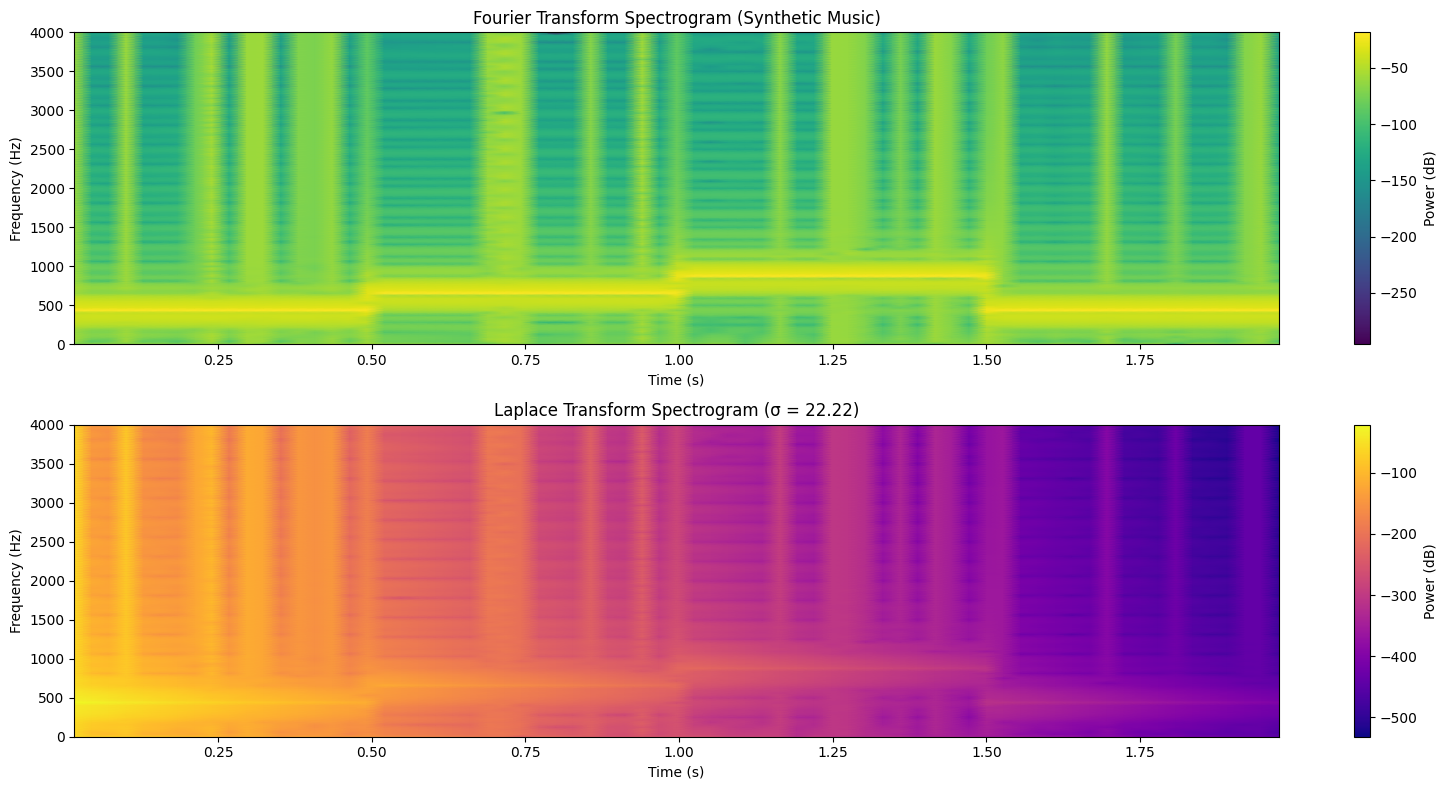

In [9]:
from scipy.io.wavfile import write

# Generate synthetic "music" (melody with transients and sustained notes)
fs = 8000  # Sampling frequency
t = np.linspace(0, 2, fs * 2, endpoint=False)  # 2 seconds duration

# Melody: Sustained notes with transients
melody = (
    np.sin(2 * np.pi * 440 * t) * (t < 0.5) +  # A4 (440 Hz), first note
    np.sin(2 * np.pi * 660 * t) * ((t >= 0.5) & (t < 1)) +  # E5 (660 Hz), second note
    np.sin(2 * np.pi * 880 * t) * ((t >= 1) & (t < 1.5)) +  # A5 (880 Hz), third note
    np.sin(2 * np.pi * 440 * t) * (t >= 1.5)  # Back to A4, fourth note
)

# Add transient-like drums (sharp pulses)
transients = (np.random.rand(len(t)) < 0.002).astype(float) * np.sin(2 * np.pi * 80 * t)

# Combine melody and transients
synthetic_music = melody + transients

# Save the generated audio to a file (for playback if needed)
write("synthetic_music.wav", fs, (synthetic_music * 32767).astype(np.int16))

# Compute Fourier Transform Spectrogram
f_ft, t_ft, Sxx_ft = spectrogram(synthetic_music, fs=fs, nperseg=256)

# Compute Laplace Transform Spectrograms for different damping factors
sigma_values = np.linspace(0, 50, 10)  # Range of damping factors
laplace_spectrograms = []
for sigma in sigma_values:
    damped_data = synthetic_music * np.exp(-sigma * t)  # Apply damping
    f_lt, t_lt, Sxx_lt = spectrogram(damped_data, fs=fs, nperseg=256)
    laplace_spectrograms.append(Sxx_lt)

# Plot FT Spectrogram
plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
plt.pcolormesh(t_ft, f_ft, 10 * np.log10(Sxx_ft), shading='gouraud', cmap='viridis')
plt.colorbar(label='Power (dB)')
plt.title("Fourier Transform Spectrogram (Synthetic Music)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

# Plot LT Spectrogram for a specific damping factor
sigma_example = 20
example_index = np.searchsorted(sigma_values, sigma_example)
plt.subplot(2, 1, 2)
plt.pcolormesh(t_lt, f_lt, 10 * np.log10(laplace_spectrograms[example_index]), shading='gouraud', cmap='plasma')
plt.colorbar(label='Power (dB)')
plt.title(f"Laplace Transform Spectrogram (σ = {sigma_values[example_index]:.2f})")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()



## **The LT in Music Restoration:**
The **Laplace Transform (LT)** can play a significant role in enhancing **music restoration** by providing a richer analysis framework than the **Fourier Transform (FT)**. It captures both the frequency components and their transient behavior, making it valuable for addressing challenges like noise reduction, artifact removal, and reverberation correction. Here's how the LT can enhance music restoration:

---

### 1. **Transient Preservation and Enhancement**
- **Challenge**:
  - In restoration, preserving transient details (like drum hits, plucked strings, or note onsets) is critical, but traditional noise-reduction methods can blur or remove these transients.
- **LT Advantage**:
  - The LT’s focus on both decay and frequency allows for better separation of transients from background noise. By tuning the damping factor ($ \sigma $), you can isolate and enhance transients while suppressing steady noise or echoes.

---

### 2. **Noise and Artifact Suppression**
- **Challenge**:
  - Old recordings often contain hiss, hum, or other noise that is steady and persistent.
- **LT Advantage**:
  - By emphasizing transient components ($ \sigma > 0 $), the LT can help isolate and suppress noise that lacks transient characteristics. It enables selective filtering based on how frequency components decay or persist.

---

### 3. **Reverberation and Echo Reduction**
- **Challenge**:
  - Excessive reverberation in recordings (e.g., from recording in a large, reflective room) can muddy the sound, making it less clear.
- **LT Advantage**:
  - The LT can analyze the decay characteristics of different frequencies. This allows for targeted suppression of reverberant tails while preserving the direct sound.

---

### 4. **Separation of Overlapping Notes**
- **Challenge**:
  - In polyphonic music, overlapping notes from different instruments or voices can make it difficult to isolate individual components.
- **LT Advantage**:
  - By adjusting $ \sigma $, the LT can emphasize either the transients (note attacks) or the decaying harmonics, making it easier to separate overlapping elements based on their temporal and spectral characteristics.

---

### 5. **Enhancing Temporal Dynamics**
- **Challenge**:
  - Older recordings may lose their dynamic range due to compression or degradation.
- **LT Advantage**:
  - The LT can help identify and restore subtle temporal variations (e.g., crescendos or decays) by analyzing how different frequencies grow or decay over time.

---

### 6. **Applications of LT in Specific Restoration Tasks**
#### A. **Click and Pop Removal**:
- LT spectrograms can identify short-lived, sharp transients caused by clicks or pops in vinyl recordings and isolate them for removal without affecting the music.

#### B. **Harmonic Reconstruction**:
- If parts of the harmonic spectrum are missing or distorted, the LT can help reconstruct these components by analyzing the temporal evolution of other harmonics.

#### C. **Old Tape Recordings**:
- LT can help manage tape hiss, flutter, or uneven decays caused by analog tape degradation.

---

### 7. **Limitations and Challenges**
While the LT has advantages, there are challenges to using it for music restoration:
- **Computational Complexity**:
  - LT analysis, particularly in the $ \sigma + j\omega $-plane, can be more computationally intensive than FT-based methods.
- **Parameter Tuning**:
  - Choosing the right damping factor ($ \sigma $) for specific restoration tasks requires expertise or adaptive algorithms.
- **Interpretation**:
  - The LT introduces an additional dimension ($ \sigma $) that may complicate automated processing compared to the simpler frequency-only focus of the FT.

---

### 8. **Practical Implementation**
To use the LT for music restoration, you could:
- Analyze the signal in the $ \sigma + j\omega $-plane to identify components with undesirable decay characteristics (e.g., noise or reverb).
- Apply selective filters or enhancement algorithms based on LT spectrograms.
- Combine LT with machine learning models trained on transient behavior and decay patterns to automate restoration.

---

This demonstration shows how the **Laplace Transform (LT)** can be used for noise reduction in a music signal:

1. **Fourier Transform Spectrogram of the Noisy Signal**:
   - Noise is distributed across the spectrum, making it difficult to isolate the musical components from the noise.

2. **Laplace Transform Spectrogram of the Noisy Signal**:
   - By applying a damping factor ($\sigma = 20 $, the LT emphasizes transient and decaying components while suppressing noise. The noise appears less prominent compared to the FT spectrogram.

3. **Fourier Transform Spectrogram of the Denoised Signal**:
   - After processing the noisy signal with LT-based damping, the resulting signal's spectrogram shows reduced noise and clearer frequency components corresponding to the original melody.

### Observations:
- The LT-based noise reduction selectively attenuates the persistent noise while preserving transient and decaying musical elements.
- This approach works well for signals where noise is steady or has different decay characteristics compared to the musical components.

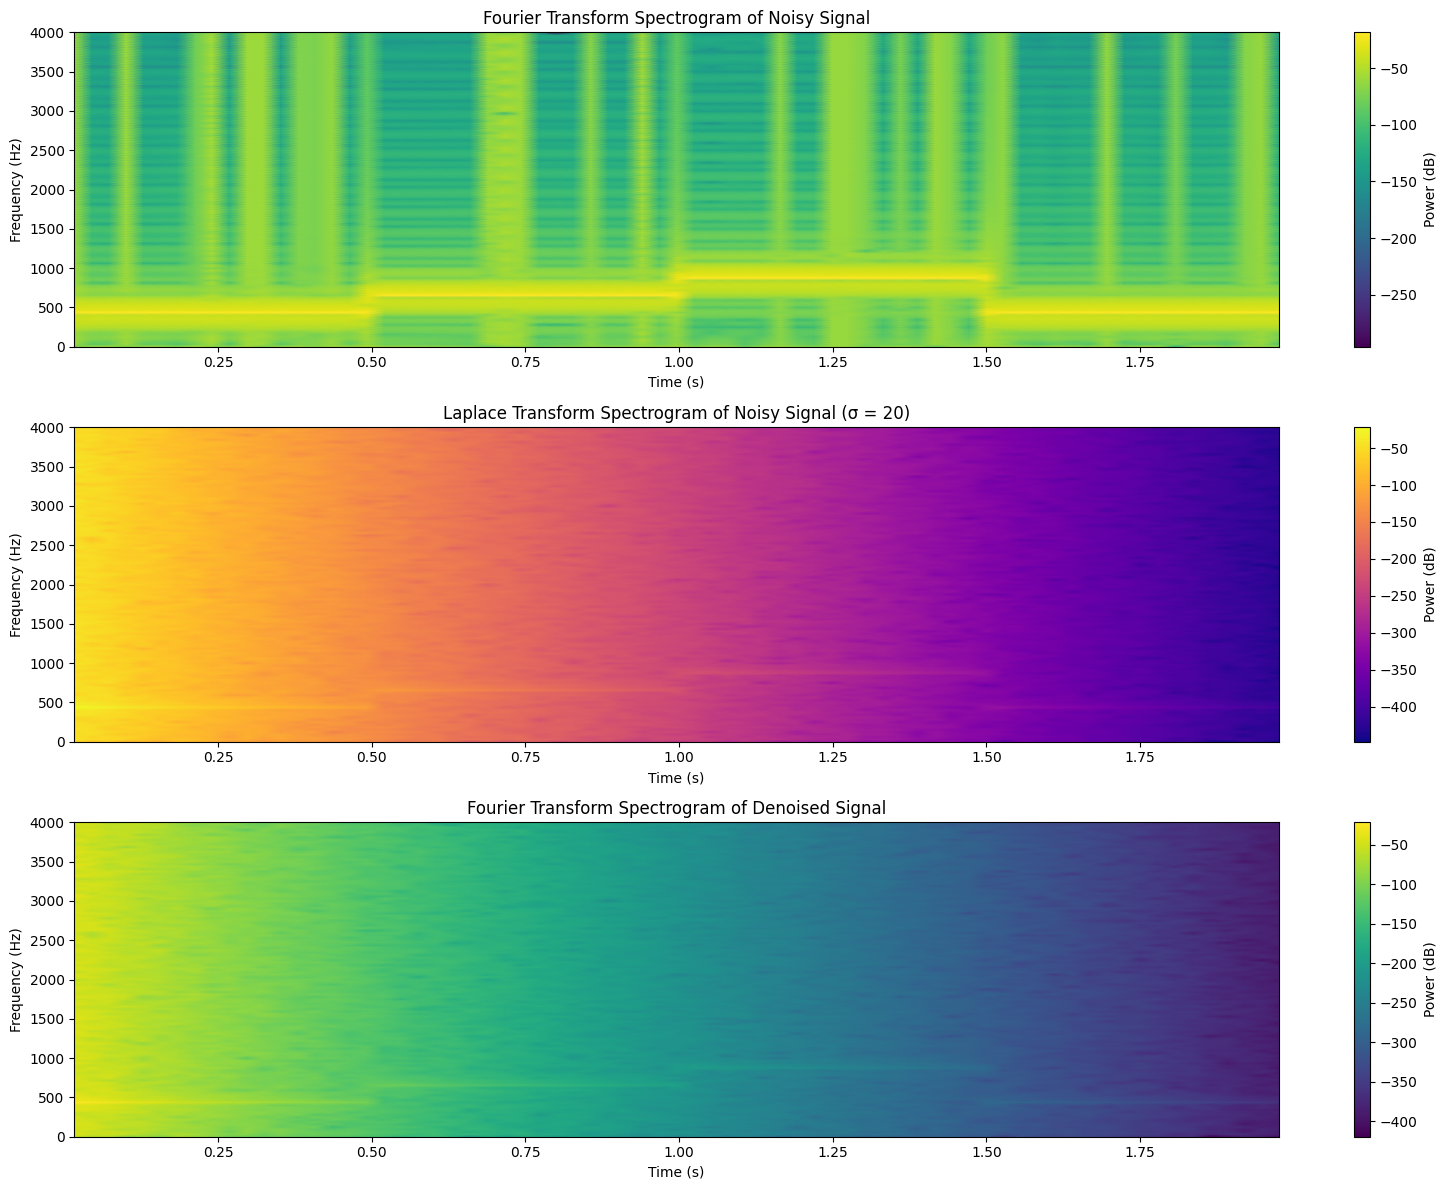

In [11]:
# Generate a synthetic noisy signal
np.random.seed(42)  # For reproducibility

# Clean signal: A simple melody
clean_signal = (
    np.sin(2 * np.pi * 440 * t) * (t < 0.5) +  # A4 (440 Hz)
    np.sin(2 * np.pi * 660 * t) * ((t >= 0.5) & (t < 1)) +  # E5 (660 Hz)
    np.sin(2 * np.pi * 880 * t) * ((t >= 1) & (t < 1.5)) +  # A5 (880 Hz)
    np.sin(2 * np.pi * 440 * t) * (t >= 1.5)  # A4 again
)

# Add Gaussian noise
noise = np.random.normal(0, 0.5, len(t))
noisy_signal = clean_signal + noise

# Compute Laplace Transform Spectrograms for the noisy signal
laplace_spectrograms_noisy = []
for sigma in sigma_values:
    damped_data_noisy = noisy_signal * np.exp(-sigma * t)  # Apply damping
    _, _, Sxx_lt_noisy = spectrogram(damped_data_noisy, fs=fs, nperseg=256)
    laplace_spectrograms_noisy.append(Sxx_lt_noisy)

# Noise reduction: Emphasize higher damping (reduce noise, preserve transients)
sigma_denoise = 20  # Example damping factor for noise suppression
damped_signal_denoised = noisy_signal * np.exp(-sigma_denoise * t)

# Compute FT of the denoised signal
f_denoise, t_denoise, Sxx_denoise = spectrogram(damped_signal_denoised, fs=fs, nperseg=256)

# Plot the results
plt.figure(figsize=(16, 12))

# Noisy signal FT spectrogram
plt.subplot(3, 1, 1)
plt.pcolormesh(t_ft, f_ft, 10 * np.log10(Sxx_ft), shading='gouraud', cmap='viridis')
plt.colorbar(label='Power (dB)')
plt.title("Fourier Transform Spectrogram of Noisy Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

# LT spectrogram for noisy signal with high damping
plt.subplot(3, 1, 2)
plt.pcolormesh(t_lt, f_lt, 10 * np.log10(laplace_spectrograms_noisy[np.searchsorted(sigma_values, sigma_denoise)]),
               shading='gouraud', cmap='plasma')
plt.colorbar(label='Power (dB)')
plt.title(f"Laplace Transform Spectrogram of Noisy Signal (σ = {sigma_denoise})")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

# Denoised signal FT spectrogram
plt.subplot(3, 1, 3)
plt.pcolormesh(t_denoise, f_denoise, 10 * np.log10(Sxx_denoise), shading='gouraud', cmap='viridis')
plt.colorbar(label='Power (dB)')
plt.title("Fourier Transform Spectrogram of Denoised Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()



## **Non-Stationary Signals**
The **Laplace Transform (LT)** is generally better equipped than the **Fourier Transform (FT)** to handle **non-stationary signals**, but it is not entirely immune to limitations when dealing with certain types of non-stationarity. Here's a detailed comparison:

---

### 1. **How the FT Handles Non-Stationary Signals**
- **FT Assumes Stationarity**:
  - The FT assumes the signal is stationary (its frequency content does not change over time).
  - When applied to non-stationary signals (e.g., chirps, transients, or modulated signals), the FT often fails to capture time-varying behavior accurately.

- **Solution: Short-Time Fourier Transform (STFT)**:
  - The STFT uses sliding windows to analyze frequency content over small time intervals. However, it suffers from the **time-frequency resolution trade-off**: narrow windows give good time resolution but poor frequency resolution, and vice versa.

---

### 2. **How the LT Handles Non-Stationary Signals**
- **Inherently Handles Growth/Decay**:
  - The LT does not assume stationarity because it includes a growth/decay factor $ e^{-\sigma t} $, making it well-suited for signals with exponential growth or decay, such as transients or signals that naturally evolve over time.

- **Time-Dependence Through $ \sigma $**:
  - By varying $ \sigma $ (the real part of the Laplace variable $ s $), the LT can emphasize or suppress different temporal features. This provides a way to analyze non-stationary signals in terms of their transient characteristics.

---

### 3. **Limitations of the LT with Non-Stationary Signals**
While the LT is more flexible than the FT for non-stationary signals, it has its own challenges:
- **Exponential Damping Only**:
  - The LT works best for signals that grow or decay exponentially. Non-stationary signals with other types of time-varying behavior (e.g., polynomial growth or periodic modulations) might not be well-captured without adaptations.

- **Global Nature**:
  - Like the FT, the LT integrates over the entire time domain. This means it provides a global picture of the signal rather than localized time-frequency information. This limitation can be addressed by combining the LT with windowing techniques.

- **Increased Complexity**:
  - The LT's additional dimension ($ \sigma $) introduces complexity in analysis and interpretation. Selecting the right $ \sigma $ to emphasize specific signal features requires expertise or adaptive methods.

---

### 4. **Comparison: LT vs. FT for Non-Stationary Signals**
| Feature                         | Fourier Transform (FT)                       | Laplace Transform (LT)                        |
|---------------------------------|----------------------------------------------|-----------------------------------------------|
| **Handles non-stationarity**    | Poorly, assumes stationarity.                | Well-suited for signals with exponential growth or decay. |
| **Focus**                       | Oscillatory (frequency) components.          | Oscillatory components + transient behavior.  |
| **Temporal adaptability**       | Requires STFT (time-frequency trade-off).    | Intrinsically adaptable via $ \sigma $.      |
| **Time-localized analysis**     | Possible with STFT or wavelets.              | Needs windowing for localized analysis.       |
| **Computational cost**          | Low (FFT is fast).                           | Higher, especially for complex $ s $-domain analysis. |

---

### 5. **Practical Applications**
- **FT**:
  - Best for periodic, steady-state signals (e.g., pure tones, stationary vibrations).
  - Suffers with transients, chirps, or modulated signals.

- **LT**:
  - Shines with signals having exponential growth/decay or transients.
  - Provides additional insights into the damping or amplification characteristics of signals.

- **Alternative: Wavelet Transform**:
  - Combines time and frequency localization.
  - Often used alongside LT for non-stationary signals, as wavelets handle non-stationarity in a more flexible manner.

---

### 6. **Conclusion**
The LT is more robust than the FT for non-stationary signals, particularly those with transient or exponentially decaying behavior. However, it is not a universal solution. For signals with highly irregular time-varying characteristics, alternative techniques like the wavelet transform or adaptive methods may provide better results.

## **Other Transforms**

### 1. **The Z-Transform**
#### Definition:
The **Z-transform** is defined for a discrete-time signal $ x[n] $ as:
$$
X(z) = \sum_{n=-\infty}^{\infty} x[n] z^{-n}
$$
where $ z $ is a complex variable.

#### Key Features:
- The Z-transform maps a discrete-time signal $ x[n] $ into the **complex plane**, similar to how the Laplace Transform maps continuous-time signals.
- The variable $ z = r e^{j\omega} $ can be decomposed into magnitude ($ r $) and phase ($ \omega $):
  - $ r $ relates to damping or growth.
  - $ \omega $ relates to oscillatory (frequency) behavior.

#### Applications:
- **Discrete Systems Analysis**:
  - The Z-transform is indispensable in analyzing and designing discrete-time systems, like digital filters.
- **Control Systems**:
  - Extends Laplace Transform techniques to sampled-data systems.
- **Stability Analysis**:
  - The **region of convergence (ROC)** of the Z-transform indicates stability (e.g., if poles lie inside the unit circle in the $ z $-plane).

#### Relation to Other Transforms:
- **Laplace Transform**:
  - The Z-transform can be seen as a sampled version of the Laplace Transform, where $ z = e^{sT} $ (with $ T $ as the sampling period).
- **Fourier Transform**:
  - The Z-transform reduces to the Discrete-Time Fourier Transform (DTFT) when $ |z| = 1 $, i.e., on the unit circle in the $ z $-plane.

---

### 2. **Wavelet Transform**
#### Definition:
The **Wavelet Transform** decomposes a signal using scaled and translated versions of a wavelet function $ \psi(t) $:
$$
W(a, b) = \int_{-\infty}^\infty x(t) \psi^*\left(\frac{t - b}{a}\right) dt
$$
where:
- $ a $ controls the scale (frequency).
- $ b $ controls the translation (time).

#### Key Features:
- Provides time-frequency localization, unlike the FT or LT, which are global transforms.
- Ideal for analyzing signals with localized or non-stationary behavior.

#### Applications:
- **Physics**: Analysis of wave phenomena, quantum mechanics, and turbulence.
- **Engineering**: Compression (e.g., JPEG2000), denoising, and fault detection.

---

### 3. **Hilbert Transform**
#### Definition:
The **Hilbert Transform** produces the analytic signal $ x_a(t) $ from a real signal $ x(t) $:
$$
x_a(t) = x(t) + j\hat{x}(t)
$$
where $ \hat{x}(t) $ is the Hilbert transform of $ x(t) $.

#### Key Features:
- Extracts the instantaneous amplitude and phase of a signal.
- Commonly used to calculate the envelope and frequency content of modulated signals.

#### Applications:
- **Physics**: Amplitude-phase analysis of oscillatory systems.
- **Engineering**: Demodulation in communications and radar systems.

---

### 4. **Radon Transform**
#### Definition:
The **Radon Transform** maps a function $ f(x, y) $ into its integrals along straight lines:
$$
R(\rho, \theta) = \int_{-\infty}^\infty f(x \cos\theta + y \sin\theta - \rho) d\rho
$$

#### Key Features:
- Used for reconstructing images from projections (e.g., CT scans).
- Basis for tomographic reconstruction algorithms.

---

### 5. **Hankel Transform**
#### Definition:
The **Hankel Transform** is used for radially symmetric functions in cylindrical coordinates:
$$
H_n(f(r)) = \int_0^\infty f(r) J_n(kr) r \, dr
$$
where $ J_n $ is the Bessel function of the first kind.

#### Key Features:
- Handles problems with radial symmetry.
- Common in solving partial differential equations in cylindrical or spherical systems.

---

### 6. **Applications of Z-Transform in Physics/Engineering**
#### Signal Processing:
- Design and analysis of **digital filters**.
- Analysis of **recursive systems** (e.g., IIR filters).

#### Control Systems:
- Discrete-time control systems, including stability via poles in the $ z $-plane.

#### Quantum Systems:
- The Z-transform can be used in systems that exhibit discrete evolution, such as **quantum walks** or discrete lattice models.

#### Discrete Mechanics:
- Helps analyze vibrations and wave propagation in discrete systems like chains or lattices.

---

### Comparison Table
| **Transform**      | **Domain**          | **Specialty**                                   | **Applications**                                   |
|---------------------|---------------------|------------------------------------------------|---------------------------------------------------|
| Fourier Transform   | Continuous/Global  | Frequency domain analysis                      | Audio, optics, vibration analysis                 |
| Laplace Transform   | Continuous/Global  | Transient and frequency behavior               | Circuits, control systems, transients             |
| Z-Transform         | Discrete/Global    | Digital and discrete systems                   | Digital filters, discrete control systems         |
| Wavelet Transform   | Continuous/Local   | Time-frequency analysis                        | Denoising, compression, turbulence analysis       |
| Hilbert Transform   | Continuous/Local   | Instantaneous amplitude and phase              | Modulation, phase recovery, vibration             |
| Radon Transform     | Continuous/Global  | Image reconstruction from projections          | CT scans, medical imaging                         |
| Hankel Transform    | Continuous/Global  | Radial symmetry in cylindrical/spherical systems | PDEs, wave equations, electromagnetics            |

---

### Insights from Tretter
Tretter emphasizes how these transforms interrelate and their specific utilities. For instance:
- **Laplace vs. Z-Transform**:
  - Laplace handles continuous systems; Z handles discrete ones.
  - $ z = e^{sT} $ bridges the two, with $ T $ as the sampling period.
- **Wavelets**:
  - Tretter discusses their flexibility in time-frequency trade-offs, which traditional transforms (FT, LT) lack.

---

The **Z-transform** is particularly practical for **discrete-time systems** and is widely used in digital signal processing (DSP), control systems, and other fields where sampled data is analyzed. Here's how the Z-transform compares practically to other transforms like the **Fourier Transform (FT)** and **Laplace Transform (LT)**:

---

### 1. **Discrete-Time Focus**
- **Z-Transform**:
  - Specifically designed for discrete-time signals, where data exists only at specific time intervals ($ x[n] $, where $ n $ is an integer).
  - It extends the analysis capabilities of the LT to sampled systems.

- **FT and LT**:
  - Both are inherently continuous-time transforms.
  - The Discrete-Time Fourier Transform (DTFT) or Discrete Fourier Transform (DFT) are used for discrete signals, but they lack the generality of the Z-transform.

**Practical Implication**:
- The Z-transform is the **default tool for digital systems** because it provides a direct method to analyze and design discrete-time filters and systems.

---

### 2. **Handling Stability in Discrete Systems**
- **Z-Plane Analysis**:
  - The Z-transform provides a natural framework for analyzing the stability of discrete systems.
  - Poles and zeros of the transfer function $ H(z) $ lie in the Z-plane, and stability is determined by the location of poles:
    - **Inside the unit circle**: Stable.
    - **On or outside the unit circle**: Unstable.

- **LT (s-Plane)**:
  - Stability for continuous systems is analyzed using the LT, where poles in the **left-half s-plane** indicate stability.

**Practical Implication**:
- The Z-transform provides a **visual and intuitive way** to assess stability for sampled systems, making it indispensable in control and DSP.

---

### 3. **Frequency and Damping Information**
- **Z-Transform**:
  - The variable $ z = re^{j\omega} $ gives access to both:
    - **Damping (growth/decay)**: Controlled by the magnitude $ r $ of $ z $.
    - **Frequency**: Represented by the angle $ \omega $ of $ z $ (related to the unit circle in the Z-plane).

- **FT and LT**:
  - FT focuses only on frequency, with no direct information about damping.
  - LT focuses on both damping and frequency but is designed for continuous systems.

**Practical Implication**:
- The Z-transform bridges the gap for discrete systems, allowing damping and frequency to be analyzed simultaneously.

---

### 4. **Filter Design**
- **Z-Transform**:
  - Provides a direct framework for designing **digital filters**, especially Infinite Impulse Response (IIR) filters:
    - Filters are designed by placing poles and zeros in the Z-plane to achieve desired frequency and time-domain characteristics.
  - Difference equations in discrete systems are naturally solved using the Z-transform.

- **FT and LT**:
  - FT helps analyze the frequency response of filters but lacks the structural insights provided by the Z-transform.
  - LT is typically used for analog filter design.

**Practical Implication**:
- The Z-transform is central to **digital filter design**, enabling precise control over frequency response and stability.

---

### 5. **Relation to Sampling**
- The Z-transform is directly tied to sampled signals and systems through the relationship $ z = e^{sT} $, where:
  - $ s $ is the Laplace variable.
  - $ T $ is the sampling period.
- This relationship makes the Z-transform an extension of the LT to sampled systems.

**Practical Implication**:
- The Z-transform seamlessly integrates continuous and discrete-time analysis, making it ideal for systems transitioning between analog and digital domains (e.g., in hybrid control systems).

---

### 6. **Frequency Domain Analysis**
- **Z-Transform on the Unit Circle**:
  - When $ |z| = 1 $, the Z-transform reduces to the Discrete-Time Fourier Transform (DTFT):
    $$
    X(e^{j\omega}) = \sum_{n=-\infty}^\infty x[n] e^{-j\omega n}
    $$
  - This provides a direct connection between the Z-transform and frequency-domain analysis.

- **FT**:
  - The FT directly operates in the frequency domain for continuous signals.

**Practical Implication**:
- The Z-transform provides the frequency response as a **special case** (on the unit circle) while retaining damping and discrete system insights elsewhere.

---

### 7. **Applications**
#### Digital Signal Processing (DSP):
- Design and analysis of digital filters (FIR and IIR).
- Modeling and analysis of digital systems, including decimation, interpolation, and sampling.

#### Control Systems:
- Stability analysis of sampled-data controllers.
- Discrete-time control design.

#### Communication Systems:
- Analysis of discrete-time signals and systems, such as pulse shaping and digital modulation.

---

### Practical Comparison Table

| **Aspect**                  | **Fourier Transform (FT)**     | **Laplace Transform (LT)**    | **Z-Transform**                 |
|-----------------------------|--------------------------------|--------------------------------|----------------------------------|
| **Domain**                  | Continuous                    | Continuous                    | Discrete                        |
| **Primary Use**             | Frequency analysis            | Transient and frequency analysis | Discrete-time system analysis    |
| **Damping/Growth**          | Not handled                   | Handled                       | Handled                         |
| **Time Systems**            | Stationary                    | Transients and stability      | Sampling and digital systems    |
| **Stability Analysis**      | Not applicable                | Left-half s-plane             | Inside the unit circle          |
| **Filter Design**           | Frequency response analysis   | Analog filters                | Digital filters (IIR, FIR)      |
| **Ease of Implementation**  | FFT makes it efficient        | Requires symbolic methods     | Efficient for discrete systems  |

---

### Insights for Practical Use
- The Z-transform is indispensable for **digital signal processing** and **discrete control systems** due to its natural handling of sampled data and stability in the Z-plane.
- It complements the LT and FT, bridging the gap between analog and digital systems.

##use of the Z-transform for analyzing and designing a digital filter:
Here's a practical example demonstrating the use of the **Z-transform** for analyzing and designing a digital filter:

### 1. **Input Signal**:
- The input is a mix of two sine waves:
  - A low-frequency component at 50 Hz.
  - A high-frequency component at 200 Hz.

### 2. **Filter Design**:
- A simple **low-pass IIR filter** is defined:
  - **Numerator coefficients (zeros):** $0.2, 0.2]$  - **Denominator coefficients (poles):** $[1, -0.6]$

### 3. **Filtered Signal**:
- The filter suppresses the 200 Hz component while allowing the 50 Hz component to pass through.

### 4. **Frequency Response**:
- The magnitude plot shows the filter's low-pass behavior, attenuating higher frequencies.
- The phase response shows the phase shift introduced by the filter.

### 5. **Z-Plane Analysis**:
- **Poles (red):**
  - Represent the system's stability and response.
  - The poles are within the unit circle, confirming the filter is stable.
- **Zeros (blue):**
  - Represent the frequencies that are attenuated or canceled.
- **Unit Circle (dotted):**
  - Indicates the boundary for system stability in the Z-plane.

### Summary:
- This example illustrates how the **Z-transform** helps analyze discrete-time systems:
  - **Stability**: Poles within the unit circle.
  - **Frequency Response**: How the filter behaves across the frequency spectrum.
  - **Filter Design**: Pole-zero placement enables precise control over the system's response.

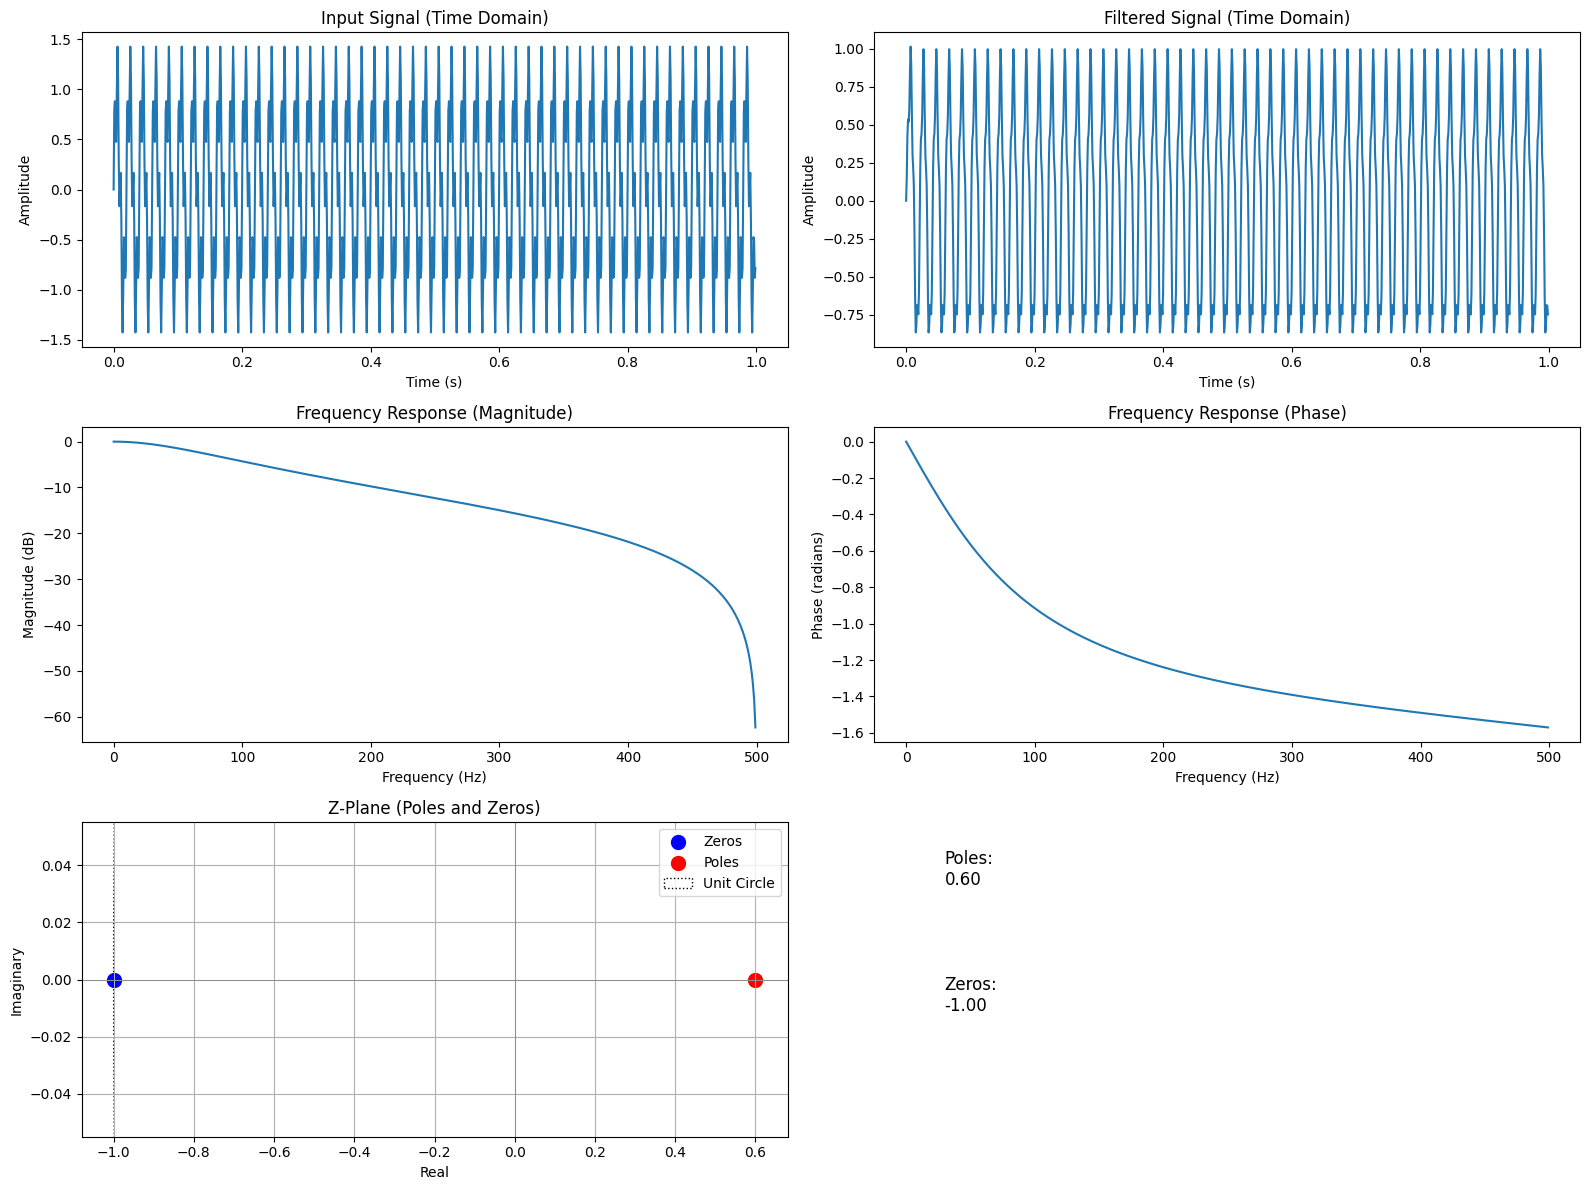

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, tf2zpk

# Define a digital filter (simple low-pass IIR filter)
b = [0.2, 0.2]  # Numerator coefficients (zeros)
a = [1, -0.6]   # Denominator coefficients (poles)

# Generate an input signal: a mix of low and high frequencies
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector (1 second)
input_signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 200 * t)  # Mix of 50 Hz and 200 Hz

# Filter the signal
output_signal = lfilter(b, a, input_signal)

# Frequency response of the filter
w, h = freqz(b, a, worN=512, fs=fs)

# Z-plane analysis (poles and zeros)
zeros, poles, gain = tf2zpk(b, a)

# Plot the results
plt.figure(figsize=(16, 12))

# Input signal
plt.subplot(3, 2, 1)
plt.plot(t, input_signal)
plt.title("Input Signal (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Output signal
plt.subplot(3, 2, 2)
plt.plot(t, output_signal)
plt.title("Filtered Signal (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Frequency response
plt.subplot(3, 2, 3)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title("Frequency Response (Magnitude)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")

# Phase response
plt.subplot(3, 2, 4)
plt.plot(w, np.angle(h))
plt.title("Frequency Response (Phase)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")

# Z-plane (poles and zeros)
plt.subplot(3, 2, 5)
plt.scatter(np.real(zeros), np.imag(zeros), label="Zeros", color='blue', s=100)
plt.scatter(np.real(poles), np.imag(poles), label="Poles", color='red', s=100)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
unit_circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='dotted', label="Unit Circle")
plt.gca().add_artist(unit_circle)
plt.title("Z-Plane (Poles and Zeros)")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.grid()
plt.legend()

# Pole-zero plot interpretation
plt.subplot(3, 2, 6)
plt.text(0.1, 0.8, "Poles:\n" + "\n".join(f"{p:.2f}" for p in poles), fontsize=12)
plt.text(0.1, 0.4, "Zeros:\n" + "\n".join(f"{z:.2f}" for z in zeros), fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()



##Comparison of ZT and WT:
The **Z-transform** and the **Wavelet Transform** serve distinct purposes in signal analysis, each with strengths and limitations. Here's a detailed comparison to highlight their differences and applications:

---

### 1. **Purpose**
| **Aspect**               | **Z-Transform**                                    | **Wavelet Transform**                                      |
|---------------------------|---------------------------------------------------|-----------------------------------------------------------|
| **Primary Focus**         | Analysis of discrete-time systems (digital filters, stability). | Time-frequency analysis of non-stationary signals.         |
| **Key Applications**      | Digital filter design, control systems, and stability analysis. | Transient analysis, compression, and denoising of signals. |

---

### 2. **Mathematical Domain**
| **Aspect**               | **Z-Transform**                                    | **Wavelet Transform**                                      |
|---------------------------|---------------------------------------------------|-----------------------------------------------------------|
| **Domain**                | Discrete-time, complex $ z $-plane.              | Continuous or discrete time with time-frequency localization. |
| **Frequency-Domain Representation** | $ z = re^{j\omega} $, combining damping ($ r $) and oscillatory ($ \omega $) behavior. | Scale ($ a $) and time-shift ($ b $) parameters provide multiresolution analysis. |

---

### 3. **Time-Frequency Analysis**
| **Aspect**               | **Z-Transform**                                    | **Wavelet Transform**                                      |
|---------------------------|---------------------------------------------------|-----------------------------------------------------------|
| **Time-Frequency Resolution** | Global; no direct time-localization without windowing. | Excellent time-frequency resolution (localized in both time and frequency). |
| **Handling Transients**   | Provides information via damping factor $ r $, but limited in resolving non-stationary signals over time. | Optimized for transient and non-stationary signals with time-scale flexibility. |

---

### 4. **Signal Type**
| **Aspect**               | **Z-Transform**                                    | **Wavelet Transform**                                      |
|---------------------------|---------------------------------------------------|-----------------------------------------------------------|
| **Input Signal**          | Discrete-time signals, often sampled from continuous signals. | Both continuous and discrete signals, suitable for non-stationary data. |
| **Stationarity**          | Best for stationary or exponentially decaying/growing signals. | Handles non-stationary signals effectively (e.g., chirps, transients). |

---

### 5. **Computational Complexity**
| **Aspect**               | **Z-Transform**                                    | **Wavelet Transform**                                      |
|---------------------------|---------------------------------------------------|-----------------------------------------------------------|
| **Complexity**            | Efficient for recursive systems and filter design; implemented with fast algorithms (FFT for DTFT-related operations). | Computationally more intensive due to multiresolution decomposition. |
| **Practical Use**         | Suitable for real-time applications in DSP and control. | Often used for offline analysis, compression, or denoising. |

---

### 6. **Applications**
| **Application Area**      | **Z-Transform**                                    | **Wavelet Transform**                                      |
|---------------------------|---------------------------------------------------|-----------------------------------------------------------|
| **Signal Processing**      | Design of IIR and FIR filters; system analysis.    | Transient detection, denoising, and time-frequency analysis. |
| **Control Systems**        | Analysis and design of discrete-time controllers.  | Less common in control systems due to time-scale focus.    |
| **Compression**            | Not directly used.                                | Widely used (e.g., JPEG2000 compression).                 |
| **Denoising**              | Can isolate noise via pole-zero analysis.         | Excellent for noise removal without affecting transients. |

---

### 7. **Strengths and Weaknesses**

#### **Z-Transform**
- **Strengths**:
  - Directly tied to discrete-time systems and stability analysis.
  - Simple, efficient algorithms (e.g., FFT for DTFT, recursive computations for filter analysis).
  - Naturally integrates with digital filter design and pole-zero analysis.

- **Weaknesses**:
  - Limited ability to handle non-stationary signals or time-localized analysis.
  - No multiresolution capabilities.

#### **Wavelet Transform**
- **Strengths**:
  - Provides time-frequency localization.
  - Excellent for analyzing transients, abrupt changes, or non-stationary signals.
  - Adaptable to different signal characteristics through choice of wavelet function.

- **Weaknesses**:
  - Computationally expensive.
  - Requires careful choice of wavelet basis for meaningful results.
  - Less intuitive for system stability or control applications.

---

### Practical Example: Signal Analysis
Suppose you have a signal with both steady-state and transient components:

- **Z-Transform**:
  - Useful for identifying steady-state frequency components and analyzing stability in discrete systems.
  - Can help design filters to isolate specific frequencies or damp oscillatory components.

- **Wavelet Transform**:
  - Ideal for detecting transients, such as sharp spikes or abrupt changes.
  - Allows detailed time-frequency analysis to study how specific features evolve over time.

---

### Conclusion
The **Z-transform** is indispensable in **digital signal processing** and **control systems**, providing powerful tools for discrete-time analysis and filter design. However, it lacks the flexibility to analyze non-stationary signals effectively.

The **Wavelet Transform**, on the other hand, excels in analyzing non-stationary signals with transients, making it invaluable in areas like **audio processing**, **image compression**, and **time-frequency analysis**.

Both transforms have distinct strengths, and choosing the right one depends on the nature of the problem.

## **Basis Functions and Maximum Entropy:**
Yes, you're correct! The **Maximum Entropy (ME) transform** uses **rational polynomials** as its basis set, distinguishing it from other transforms like the **Fourier Transform (FT)**, **Laplace Transform (LT)**, or **Z-transform**, which rely on orthogonal functions. Here's a deeper exploration of these ideas:

---

### 1. **Basis Functions in Transforms**
- **Fourier Transform (FT)**:
  - Uses **orthogonal trigonometric functions** ($ e^{j\omega t} $, or equivalently sine and cosine functions).
  - These functions form an orthogonal basis over the interval $ [-\pi, \pi] $ (or other defined intervals in frequency space).
  - Orthogonality ensures that each frequency component can be separated uniquely and independently.

- **Laplace Transform (LT)**:
  - Extends the FT by adding an exponential damping factor $ e^{-\sigma t} $, resulting in basis functions of the form $ e^{-(\sigma + j\omega)t} $.
  - These functions are not strictly orthogonal over a finite range but work effectively due to their exponential decay or growth.

- **Z-Transform**:
  - Similar to the LT but tailored for discrete systems. The basis functions $ z^{-n} $ (or equivalently $ e^{-j\omega n} $ on the unit circle) form the backbone of the Z-transform.

- **Wavelet Transform**:
  - Uses scaled and translated versions of a **wavelet basis** (e.g., Haar, Daubechies, Morlet). These functions are orthogonal in both time and frequency.

---

### 2. **Maximum Entropy Transform**
- The Maximum Entropy (ME) transform takes a different approach:
  - **Rational Polynomials**: The ME transform represents the signal using rational polynomial basis functions:
    $$
    H(s) = \frac{P(s)}{Q(s)}
    $$
    where $ P(s) $ and $ Q(s) $ are polynomials.
  - **Rationale**:
    - Rational polynomials can represent systems with poles and zeros naturally, making them well-suited for spectral estimation and system modeling.
    - This basis is particularly effective for **exponentially decaying signals** or systems with sharp spectral peaks.
  
#### Why Rational Polynomials?
- Rational polynomials can capture sharp spectral features more compactly than trigonometric or wavelet bases.
- By optimizing entropy, the ME transform seeks the "smoothest" spectrum that is consistent with the given data, avoiding overfitting noise.

---

### 3. **Maximum Entropy Principle**
- The ME transform applies the **Maximum Entropy Principle (MEP)**:
  - Among all possible spectra that match the observed data, it selects the one with the **highest entropy**.
  - **Entropy** in this context refers to the unpredictability or smoothness of the spectral estimate:
    $$
    S = -\int P(f) \log P(f) \, df
    $$
    where $ P(f) $ is the power spectral density.

- This principle leads to spectral estimates that are:
  - **Smooth**: Avoid overfitting to noise.
  - **Compact**: Represented by a minimal set of poles and zeros.

---

### 4. **Comparison to Other Transforms**
| **Aspect**                 | **Fourier Transform**       | **Maximum Entropy Transform**         |
|----------------------------|-----------------------------|---------------------------------------|
| **Basis Functions**         | Orthogonal trig functions   | Rational polynomials                 |
| **Focus**                   | Frequency decomposition     | Spectral estimation (sharp peaks)    |
| **Time/Space Localization** | Global                     | Global (but smooth and compact)      |
| **Handling Noise**          | Sensitive (no smoothing)    | Robust against noise (smooth spectrum) |
| **Complexity**              | Linear in $ N $ (FFT)     | Nonlinear (requires solving equations) |

---

### 5. **Applications of Maximum Entropy Transform**
- **Spectral Estimation**:
  - Used to analyze signals with sharp spectral features (e.g., narrowband peaks or exponentially decaying components).
- **System Identification**:
  - Models systems by identifying poles and zeros of transfer functions.
- **Geophysics**:
  - Applied in seismic signal processing to estimate reflection coefficients.
- **Astronomy**:
  - Used in image reconstruction, such as restoring blurred telescope images.
- **Speech Processing**:
  - Models vocal tract resonances by estimating the formant frequencies.

---

### 6. **Advantages of Rational Polynomials**
- **Flexibility**:
  - Can represent both smooth and sharply peaked spectra.
- **Compact Representation**:
  - Captures system dynamics efficiently using a small number of poles and zeros.
- **Noise Handling**:
  - Smooth spectrum estimates avoid overfitting to noise.

---

### 7. **Challenges**
- **Non-Orthogonality**:
  - Rational polynomials are not orthogonal, making computations more complex compared to orthogonal bases like sinusoids or wavelets.
- **Parameter Estimation**:
  - Finding the optimal rational polynomial parameters (poles, zeros) requires solving nonlinear optimization problems, which can be computationally expensive.

---

### 8. **Practical Considerations**
If you're comparing the ME transform with the FT or LT:
- Use **FT** for general frequency-domain analysis and signal decomposition.
- Use **ME** for cases requiring precise spectral estimates with sharp features (e.g., resonances or peaks in noise).
- Use **LT** for transient analysis and modeling exponentially decaying or growing systems.

---

##**Walsh-Hadamard Transform (HT):**
The **Hadamard Transform** (or **Walsh-Hadamard Transform**, WHT) is a fascinating tool that can be considered a **special case** of the Fourier Transform (FT) and, to some extent, the Laplace Transform (LT). This connection arises because it operates in the domain of **sequency space**, which is analogous to frequency space in the FT but defined in terms of the number of zero-crossings (changes in sign) per unit time. Here's a closer look:

---

### 1. **Hadamard Transform Overview**
#### Definition:
The **Hadamard Transform** is a linear, orthogonal transform that decomposes signals into a basis of Walsh functions:
- Walsh functions are square-wave functions with values $ \{-1, +1\} $, which form an orthogonal set over the interval $ [0, 1] $.
- The transform is defined for discrete data points $ x[n] $ as:
$$
H(x) = Wx
$$
where $ W $ is the Hadamard matrix, and $ x $ is the input signal.

#### Key Features:
- Operates in **sequency space**, not frequency space.
  - Sequency: The number of zero-crossings (or sign changes) in a function per unit time.
- Unlike the FT, the basis functions are **non-sinusoidal** and binary ($ \{-1, +1\} $).

---

### 2. **Connection to FT and LT**
#### Relationship to Fourier Transform:
- The WHT is analogous to the FT in that it decomposes a signal into orthogonal basis functions.
- Instead of trigonometric functions (sine and cosine), it uses Walsh functions.
- In sequency space:
  - Sequency is analogous to frequency.
  - Zero-crossings replace oscillatory behavior in defining signal components.

#### Relationship to Laplace Transform:
- While the LT focuses on exponential growth/decay in $ s = \sigma + j\omega $, the WHT operates entirely in the discrete domain.
- In certain applications (e.g., binary or digital signals), the WHT can represent behaviors analogous to Laplace-domain poles and zeros in sequency space.

---

### 3. **Special Case Nature**
The Hadamard Transform can be viewed as a **special case** of the FT or LT under specific conditions:
- **FT Connection**:
  - If a signal is binary or piecewise constant, its FT can be equivalently represented in sequency space using the WHT.
  - The WHT simplifies computations for such signals because Walsh functions are binary and easy to compute.

- **LT Connection**:
  - The LT is continuous, while the WHT is discrete and suited to digital systems.
  - In systems where growth/decay is modeled in a binary state space, the WHT can act as a Laplace-like transform.

---

### 4. **Sequency vs. Frequency**
| **Aspect**          | **Frequency (FT)**                  | **Sequency (WHT)**                |
|----------------------|-------------------------------------|------------------------------------|
| **Basis Functions**  | Sine and cosine (oscillatory)       | Walsh functions (binary, square)  |
| **Space**            | Frequency space (oscillations/unit time). | Sequency space (zero-crossings/unit time). |
| **Continuity**       | Continuous or discrete             | Strictly discrete.                |

---

### 5. **Applications of the Hadamard Transform**
- **Signal Processing**:
  - Efficient for binary signals or systems (e.g., error-correcting codes, image compression).
- **Communications**:
  - Used in spread spectrum techniques like CDMA (Code-Division Multiple Access).
- **Data Analysis**:
  - Suitable for sparse data or data with binary characteristics.
- **Quantum Computing**:
  - A fundamental operation in quantum algorithms (e.g., the Hadamard gate in quantum circuits).

---

### 6. **Advantages of the Hadamard Transform**
- **Computational Efficiency**:
  - Faster than the FFT for binary signals, with complexity $ O(N \log N) $.
- **Simplicity**:
  - Walsh functions are binary, making implementation straightforward.
- **Specialized Use**:
  - Ideal for signals or systems with piecewise constant or binary behavior.

---

### 7. **Limitations**
- The WHT is not suitable for continuous or sinusoidal signals because its basis functions are discontinuous.
- Sequency space is less intuitive for general-purpose analysis compared to frequency space.

---

### Practical Comparison of FT, LT, and WHT
| **Aspect**             | **Fourier Transform**              | **Laplace Transform**               | **Hadamard Transform**            |
|-------------------------|-------------------------------------|--------------------------------------|------------------------------------|
| **Basis Functions**      | Trigonometric (sine, cosine)       | Exponential ($ e^{-\sigma + j\omega} $) | Walsh functions ($ \{-1, +1\} $) |
| **Domain**              | Continuous/discrete time           | Continuous time                     | Discrete time                     |
| **Applications**        | General-purpose signal processing, audio, optics. | System analysis, stability, transients. | Binary systems, digital communications. |
| **Computational Complexity** | Efficient with FFT ($ O(N \log N) $). | Computationally intensive for general use. | Efficient for binary signals ($ O(N \log N) $). |

---

### Conclusion
The Hadamard Transform is a **specialized tool** that excels in systems involving binary or piecewise constant signals. It can be considered a special case of the FT and LT when the signal or application aligns with sequency space rather than frequency space. Its simplicity and efficiency make it indispensable in digital communications and quantum computing.

## **Hadamard Transform** applied to a simple binary signal: **

1. **Original Signal**:
   - A binary sequence ($ \{1, -1\} $) of 8 points, representing the input signal.

2. **Hadamard Transform**:
   - The transform projects the signal into **sequency space**, where each component represents a Walsh function's contribution.
   - **Sequency Index**: Indicates the number of zero-crossings (changes in sign) per unit time, analogous to frequency in the Fourier Transform.

### Observations:
- The Hadamard Transform decomposes the signal into a new orthogonal basis formed by Walsh functions.
- High-sequency components correspond to rapidly varying parts of the signal, while low-sequency components represent smoother, longer variations.

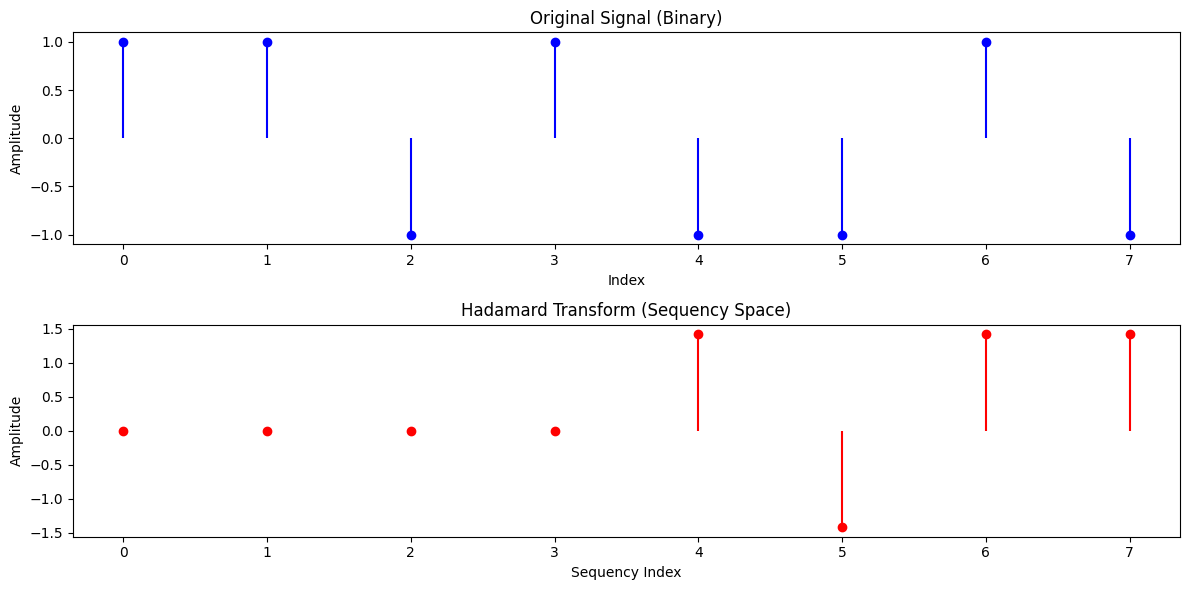

In [14]:
from scipy.linalg import hadamard
import numpy as np
import matplotlib.pyplot as plt

# Define a simple binary signal
n = 8  # Number of points (must be a power of 2 for Hadamard transform)
signal = np.array([1, 1, -1, 1, -1, -1, 1, -1])  # Example binary signal

# Generate the Hadamard matrix of size n x n
H = hadamard(n)

# Perform the Hadamard Transform
hadamard_transform = np.dot(H, signal)

# Normalize the result for visualization
normalized_transform = hadamard_transform / np.sqrt(n)

# Redefine the plotting without the deprecated `use_line_collection` argument
plt.figure(figsize=(12, 6))

# Plot the original signal
plt.subplot(2, 1, 1)
plt.stem(signal, basefmt=" ", markerfmt="o", linefmt="b-")
plt.title("Original Signal (Binary)")
plt.xlabel("Index")
plt.ylabel("Amplitude")

# Plot the Hadamard Transform (sequency space representation)
plt.subplot(2, 1, 2)
plt.stem(normalized_transform, basefmt=" ", markerfmt="o", linefmt="r-")
plt.title("Hadamard Transform (Sequency Space)")
plt.xlabel("Sequency Index")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()




## **Comparing the **Hadamard Transform (HT)** and the **Fourier Transform  (FT)**
Both are linear transforms that decompose a signal into basis functions, but they differ significantly in their choice of basis, mathematical properties, and applications. Here’s a detailed comparison:

---

### 1. **Basis Functions**
- **Fourier Transform (FT)**:
  - Basis functions are **sine and cosine** waves, or equivalently, **complex exponentials** ($ e^{j\omega t} $).
  - These functions are **orthogonal** over a continuous interval and represent oscillatory behavior (frequency).

- **Hadamard Transform (HT)**:
  - Basis functions are **Walsh functions**, which are piecewise constant and take values $ \{-1, +1\} $.
  - Walsh functions are also orthogonal, but they represent **sequency** (number of zero-crossings per unit time) instead of frequency.

---

### 2. **Domain of Application**
- **FT**:
  - Used for continuous or discrete-time signals, often in the context of frequency analysis.
  - Suitable for signals with smooth variations or oscillatory components.

- **HT**:
  - Primarily used for discrete-time signals, especially those with binary or piecewise constant values.
  - Common in digital systems and communications where data is often binary or blocky.

---

### 3. **Mathematical Representation**
| **Transform**      | **Definition**                                           |
|---------------------|----------------------------------------------------------|
| **Fourier Transform** | $ X(f) = \int_{-\infty}^\infty x(t) e^{-j2\pi ft} dt $   |
| **Hadamard Transform** | $ H(x) = Wx $, where $ W $ is the Hadamard matrix.   |

- The HT operates using a recursive **Hadamard matrix**, which is simple and efficient to compute for signals of size $ N = 2^n $.

---

### 4. **Time-Frequency/Sequency Analysis**
- **FT**:
  - Decomposes signals into **frequency components**, showing how much of each frequency is present.
  - Frequency space is continuous for the continuous FT and discrete for the discrete FT.

- **HT**:
  - Decomposes signals into **sequency components**, showing contributions from Walsh functions with different zero-crossing rates.
  - Sequency space is strictly discrete.

---

### 5. **Computational Complexity**
- **FT**:
  - With the **Fast Fourier Transform (FFT)**, the computational complexity is $ O(N \log N) $, making it efficient for large signals.
- **HT**:
  - The Hadamard Transform is also $ O(N \log N) $, but it avoids complex arithmetic, often making it faster for binary or blocky signals.

---

### 6. **Applications**
| **Transform**      | **Applications**                                       |
|---------------------|--------------------------------------------------------|
| **Fourier Transform** | Audio processing, spectral analysis, communications, and image filtering. |
| **Hadamard Transform** | Error correction, image compression, CDMA (Code Division Multiple Access), and quantum computing. |

- The HT is particularly useful for binary signals and systems, such as digital communications and error-correcting codes.

---

### 7. **Advantages and Disadvantages**
#### **Fourier Transform**
- **Advantages**:
  - Well-suited for signals with oscillatory or smooth behavior.
  - Natural for analyzing frequency content and filtering.
- **Disadvantages**:
  - Poor performance on blocky or binary signals.
  - Requires complex arithmetic.

#### **Hadamard Transform**
- **Advantages**:
  - Excellent for signals with binary or piecewise constant behavior.
  - Simple to compute (binary arithmetic only).
  - Efficient for sparse signals.
- **Disadvantages**:
  - Not suitable for smooth or oscillatory signals.
  - Sequency space is less intuitive compared to frequency space.

---

### 8. **Comparison Table**

| **Feature**           | **Fourier Transform**                     | **Hadamard Transform**                      |
|------------------------|-------------------------------------------|---------------------------------------------|
| **Basis Functions**    | Sine and cosine (oscillatory).            | Walsh functions (binary, stepwise).         |
| **Domain**             | Continuous and discrete signals.          | Discrete, particularly binary signals.      |
| **Time-Frequency**     | Frequency space (oscillations/unit time). | Sequency space (zero-crossings/unit time).  |
| **Smooth Signals**     | Performs well.                            | Not suitable.                               |
| **Binary Signals**     | Requires many terms for accuracy.         | Performs well.                              |
| **Computation**        | Efficient via FFT ($ O(N \log N) $).     | Efficient via recursive algorithms.         |
| **Applications**       | Spectral analysis, filtering, audio, optics. | Digital systems, quantum computing, communications. |

---

### 9. **Practical Insight**
- The HT can be considered a **special case** of the FT when the signal is binary or piecewise constant. However, for smooth or oscillatory signals, the FT is far superior due to its natural alignment with sinusoidal behavior.
- In modern applications, the HT shines in:
  - **Error-correcting codes** (e.g., Reed-Muller codes).
  - **Image compression** (e.g., lossless encoding).
  - **Quantum algorithms** (e.g., Hadamard gates in quantum circuits).

---

## **Connecting the **Hadamard Transform (HT)** to **quantum mechanics (QM)**
There is a relationship to the **Bloch sphere**, **superpositions**, and its recursive, matrix-based representation:

---

### 1. **Recovering the HT from the FT**
Your approach of whitening an oscillatory signal and then rounding it to generate zero crossings directly relates to how the HT operates in **sequency space** rather than **frequency space**:
- Whitening transforms the signal's energy uniformly across frequencies.
- Rounding enforces the binary nature ($ \{-1, +1\} $) of Walsh functions, creating stepwise components.

This process highlights the HT as a **binary, discrete analog** of the FT in certain contexts, particularly for signals where oscillations can be mapped to zero-crossings.

---

### 2. **The Hadamard Transform in Quantum Mechanics**
#### A. **Hadamard Gates in QM**
- In quantum computing, the **Hadamard gate** is a fundamental operation that creates **quantum superpositions**:
  - It acts on a single qubit:
    $$
    H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
    $$
  - Applying $ H $ to the computational basis states ($ |0\rangle $ and $ |1\rangle $) yields:
    - $ H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) $
    - $ H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) $
  - This operation generates superpositions, a cornerstone of quantum computation.

#### B. **Recursive Structure**
- The **Walsh-Hadamard Transform** is a higher-dimensional generalization of the Hadamard gate:
  - For $ n $-qubits, the Hadamard matrix $ H^{\otimes n} $ (tensor power) is applied recursively.
  - This recursive structure mirrors how the HT operates in classical signal processing.

#### C. **Dirac Matrix Representation**
- The **Dirac notation** provides a natural framework for HT operations in QM:
  - Basis states $ |0\rangle $ and $ |1\rangle $ correspond to Walsh function components.
  - Recursive application of Hadamard gates builds higher-order superpositions akin to the hierarchical Walsh functions in the HT.

#### D. **Applications in QM**
- **Quantum Algorithms**:
  - Hadamard gates are used to initialize quantum states into equal superpositions, critical for algorithms like Grover's search and Shor's factoring.
- **Measurement**:
  - The HT's ability to decompose signals into orthogonal components parallels how quantum measurements project states into eigenbases.

---

### 3. **Bloch Sphere and HT Superpositions**
#### A. **Using Bloch Sphere Weights**
- The **Bloch sphere** represents the state of a qubit as a point on or inside the sphere:
  $$
  |\psi\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle + e^{i\phi}\sin\left(\frac{\theta}{2}\right)|1\rangle
  $$
  - $ \theta $ controls the relative weight between $ |0\rangle $ and $ |1\rangle $.
  - $ \phi $ controls the phase relationship.

- Incorporating Bloch sphere weights into the HT:
  - The HT can be modified to include **phase factors** ($ e^{i\phi} $) or amplitude scaling ($ \cos(\theta) $, $ \sin(\theta) $) to construct quantum-like superpositions.
  - This enables a connection between classical HT operations and the probabilistic nature of quantum mechanics.

#### B. **Constructing Superpositions**
- The HT, through its recursive structure, naturally generates **hierarchical superpositions**:
  - Each step in the recursion represents a higher-order combination of basis functions.
  - Using Bloch sphere weights, these combinations can be tuned to reflect desired quantum probabilities or phases.

#### C. **Interference Patterns**
- By combining HT-based superpositions with phase weights, you can mimic **quantum interference** effects:
  - Constructive and destructive interference emerge from the alignment of phases and amplitudes.

---

### 4. **Comparison to Fourier Methods**
The HT's binary, discrete nature contrasts with the FT's continuous, oscillatory approach. However, when combined with weights and phases from the Bloch sphere:
- The HT can emulate quantum-like behavior, bridging classical and quantum realms.
- Recursive Hadamard operations provide a computationally efficient framework for generating superpositions, analogous to Fourier series but focused on stepwise transitions.

---

### 5. **Potential Applications**
#### Classical Signal Processing:
- Introducing Bloch sphere-inspired weights to the HT can enable:
  - Enhanced signal decomposition.
  - Phase-sensitive encoding and decoding.
  
#### Quantum Computing:
- Understanding the HT’s recursive structure aids in designing efficient quantum circuits for algorithms leveraging superpositions.

#### Hybrid Systems:
- Combining HT and FT methods could enable new approaches to hybrid classical-quantum algorithms, particularly in quantum signal processing.

---

### Summary
The **Hadamard Transform** connects deeply to **quantum mechanics** through:
1. Its role in generating superpositions via Hadamard gates.
2. Its recursive matrix structure, akin to Dirac representations.
3. The potential for **Bloch sphere weighting** to emulate quantum superpositions and interference.

These connections make the HT a valuable tool not only in classical domains like signal processing but also as a bridge to quantum computation.

##**Sampling:**
### 1. **General Multiplication ↔ Convolution Duality**
- **Transform Duality**:
  - In transforms like the **Fourier Transform (FT)** and **Laplace Transform (LT)**:
    - **Multiplication in one domain** (e.g., frequency domain) corresponds to **convolution in the other domain** (e.g., time domain), and vice versa.
    $$
    F(x \ast y) = F(x) \cdot F(y)
    $$
    $$
    F(x \cdot y) = F(x) \ast F(y)
    $$
  - This duality reflects the deep connection between these spaces and is a cornerstone of signal processing.

- **Implication for Basis Functions**:
  - When representing a signal as a sum of basis functions (e.g., sinusoids in FT, Walsh functions in HT), the transform maps the signal to **weights** associated with each basis function.
  - These weights are subject to the nature of sampling (discussed below), which defines how accurately the convolution and multiplication interplay are represented.

---

### 2. **Sampling: Delta Functions and Beyond**
- **Delta Function Sampling**:
  - The delta function ($ \delta(t) $) is often used as a mathematical idealization of sampling:
    - A sampled signal is modeled as a train of impulses:
    $$
    x_s(t) = \sum_{n=-\infty}^\infty x(nT) \delta(t - nT)
    $$
    - This works well in theory but hides practical nuances:
      - Real samples are not perfect impulses.
      - Samples may represent averages, weighted integrals, or other "blurry" versions of the signal over the sampling interval.
  
- **Sampling Interval and "Quantisation"**:
  - The finite nature of sampling intervals introduces a **quantization** of information:
    - The **sampling train length** limits how much of the signal is captured in the spectral domain.
    - This introduces artifacts like **spectral leakage** or aliasing, depending on the transform used.

- **Alternative Representations**:
  - Instead of delta functions, **basis functions for sampling** could be expanded:
    - Rectangular windows (boxcar functions).
    - Weighted averages (e.g., sinc functions).
    - Polynomial interpolants (splines).
  - These alternatives offer richer models of sampling but at the cost of simplicity.

---

### 3. **Recursive Nature of Walsh/Hadamard Matrices**
- **Efficient Arithmetic**:
  - The recursive generation of **Hadamard Matrices** directly incorporates the structure of the basis functions:
$$
    H_2 = \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}, \quad H_{2^n} = \begin{bmatrix} H_{2^{n-1}} & H_{2^{n-1}} \\ H_{2^{n-1}} & -H_{2^{n-1}} \end{bmatrix}
$$
    - Each recursion step defines the interaction between lower- and higher-sequency components.
    - This structure avoids explicit multiplication during the transformation, packing the operation into matrix construction.
  
- **Packing Operations**:
  - The Hadamard matrix generation algorithm effectively **precomputes** the product of weights and basis functions:
    - Each matrix entry defines the result of a specific basis function interaction, reducing the computational load during application.
    - This is why the WHT operates with $ O(N \log N) $ complexity.

---

### 4. **Connection to Sampling Trains and Quantisation**
- The length of the sampling train defines the effective **resolution** in the transform domain:
  - Short trains limit the number of basis functions that can be used, creating a kind of **second quantization** in the transform space.
  - Recursive structures (like in Walsh matrices) naturally adjust to the sampling resolution:
    - Smaller matrices correspond to shorter trains.
    - Larger matrices recursively refine the resolution in sequency space.

---

### 5. **Recursive Walsh/Hadamard Basis ↔ FT/LT Basis**
- **Recursive Basis Packing**:
  - The Walsh functions inherently embed a hierarchy of sequency components, much like how the FT spans oscillatory frequencies.
  - However, Walsh recursion achieves this without trigonometric arithmetic:
    - It relies on sign changes rather than oscillations.
    - This binary property allows fast computation in digital systems.

- **Dirac-like Representation**:
  - Recursive matrix structures, like the Hadamard matrix, resemble the **Dirac matrix representation** in quantum mechanics:
    - Each recursion layer introduces a higher-order combination of states (or sequency levels).
    - This mirrors how superpositions are constructed in quantum systems.

---

### 6. **Weighting Walsh Functions with Sampling**
- By introducing **custom weights** to the Walsh functions, one can:
  - Adjust for non-ideal sampling effects.
  - Create weighted superpositions similar to quantum states on the Bloch sphere.
  - Enable a hybrid representation that bridges the binary world of Walsh functions and the continuous nature of FT/LT basis functions.

---

### 7. **Branching Ideas for Exploration**
- **Sampling Representations**:
  - Explore alternative sampling models (e.g., sinc or polynomial-based) and their impact on transform accuracy.
- **Hadamard in QM**:
  - Deep dive into how Hadamard recursion mirrors Dirac representations in quantum mechanics.
- **Weighted Superpositions**:
  - Construct Walsh/Hadamard-based transforms with Bloch sphere-inspired weighting schemes.
- **Packing and Recursion**:
  - Investigate how recursive matrix construction embeds basis function multiplication.

---